**Homework - 2: Souvik Roy**

In [336]:
# Load dataset
import numpy as np
import pandas as pd

Data = pd.read_csv('day.csv')
Data.isnull().sum()
Data


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


*Data Preprocessing*

In [337]:
prep_Data =Data.drop(['instant','dteday','casual','registered'],axis='columns') # Drop the unnnecessary features
prep_Data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


Scalling the features

In [338]:
targets = prep_Data['cnt']
targets
unscaled_features = prep_Data.drop('cnt', axis = 'columns')
unscaled_features

from sklearn.preprocessing import Normalizer

scaler = Normalizer()
features = scaler.fit_transform(unscaled_features)
features

array([[0.15263034, 0.        , 0.15263034, ..., 0.05550021, 0.12299457,
        0.02448893],
       [0.38338226, 0.        , 0.38338226, ..., 0.13561726, 0.2668674 ,
        0.09528544],
       [0.43325791, 0.        , 0.43325791, ..., 0.08206121, 0.18945199,
        0.10758184],
       ...,
       [0.07318493, 0.07318493, 0.87821921, ..., 0.01774003, 0.05510218,
        0.00910296],
       [0.08234546, 0.08234546, 0.98814551, ..., 0.01907944, 0.03980028,
        0.028883  ],
       [0.08098985, 0.08098985, 0.97187814, ..., 0.01810018, 0.04677164,
        0.01254095]])

In [339]:
# See the corelation 
prep_Data[prep_Data.columns].corr()['cnt']


season        0.406100
yr            0.566710
mnth          0.279977
holiday      -0.068348
weekday       0.067443
workingday    0.061156
weathersit   -0.297391
temp          0.627494
atemp         0.631066
hum          -0.100659
windspeed    -0.234545
cnt           1.000000
Name: cnt, dtype: float64

Train Test splitting with 20% test set

In [340]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size= 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(584, 11)
(147, 11)
(584,)
(147,)


Linear Regression Model

In [341]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)
y_pred_linreg = linear_reg.predict(x_test)

# Evaluation
MSE_lin_reg = mean_squared_error(y_test,y_pred_linreg)
r2_lin_reg = r2_score(y_test,y_pred_linreg)
print(linear_reg.coef_)
print(f'Mean Squared Error for Linear Regression = {MSE_lin_reg}')
print(f'R square Error for Linear Regression = {r2_lin_reg}')
print(linear_reg.coef_)

[  6407.20318822  10949.03547747   2998.18823551  -2617.90312813
   2548.00626405   -721.2060451   -2356.03170618  61529.31383018
 -41347.84791593  -7505.5865869  -37062.81533355]
Mean Squared Error for Linear Regression = 1253676.8063283805
R square Error for Linear Regression = 0.6555155939219669
[  6407.20318822  10949.03547747   2998.18823551  -2617.90312813
   2548.00626405   -721.2060451   -2356.03170618  61529.31383018
 -41347.84791593  -7505.5865869  -37062.81533355]


Lasso Regression

In [342]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# At first find the best alpha for random state = 14
param_grid = {'alpha': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 10, 100]}
grid_search = GridSearchCV(Lasso(random_state=14), param_grid, cv = 10, scoring= 'neg_mean_squared_error')
grid_search.fit(features,targets)

best_alpha = grid_search.best_params_['alpha'] # Best Alpha Value
print(f"Best alpha: {best_alpha}")

# Implementation of Lasso Regression
lasso = Lasso(alpha= best_alpha, random_state= 14)
lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)

# Evaluation
MSE_lasso = mean_squared_error(y_test,y_pred_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)

print(f'Mean Squared Error for Lasso Regression = {MSE_lasso}')
print(f'R square Error for Lasso Regression = {r2_lasso}')
print(lasso.coef_)

Best alpha: 1
Mean Squared Error for Lasso Regression = 1227897.892802918
R square Error for Lasso Regression = 0.6625991051350075
[  6055.81162307  10658.25193654   3589.21855957  -1920.20682052
   2753.2938155    -778.1874133   -2784.51671518  21332.3709275
      0.          -7408.99441074 -30999.7201137 ]


/opt/anaconda3/envs/my_ml_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.736e+05, tolerance: 2.151e+05
  model = cd_fast.enet_coordinate_descent(


Ridge Regression

In [343]:
from sklearn.linear_model import Ridge

# At first find the best alpha for random state = 14
param_grid = {'alpha': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(random_state=14), param_grid, cv = 10, scoring= 'neg_mean_squared_error')
grid_search.fit(features,targets)

best_alpha = grid_search.best_params_['alpha'] # Best Alpha Value
print(f"Best alpha: {best_alpha}")

# Implementation of Ridge Regression
ridge = Ridge(alpha= best_alpha, random_state= 14)
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)

# Evaluation
MSE_ridge = mean_squared_error(y_test,y_pred_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)

print(f'Mean Squared Error for Ridge Regression = {MSE_ridge}')
print(f'R square Error for Ridge Regression = {r2_ridge}')
print(ridge.coef_)

Best alpha: 0.2
Mean Squared Error for Ridge Regression = 1144175.453890436
R square Error for Ridge Regression = 0.685604296344245
[  5906.59810577  10008.82481799   4890.48765402  -3246.92651158
   3365.79928128  -1566.41512227  -3753.22529124   8680.66575795
   7006.80865484  -4863.59234643 -12706.33342988]


Result Visualization

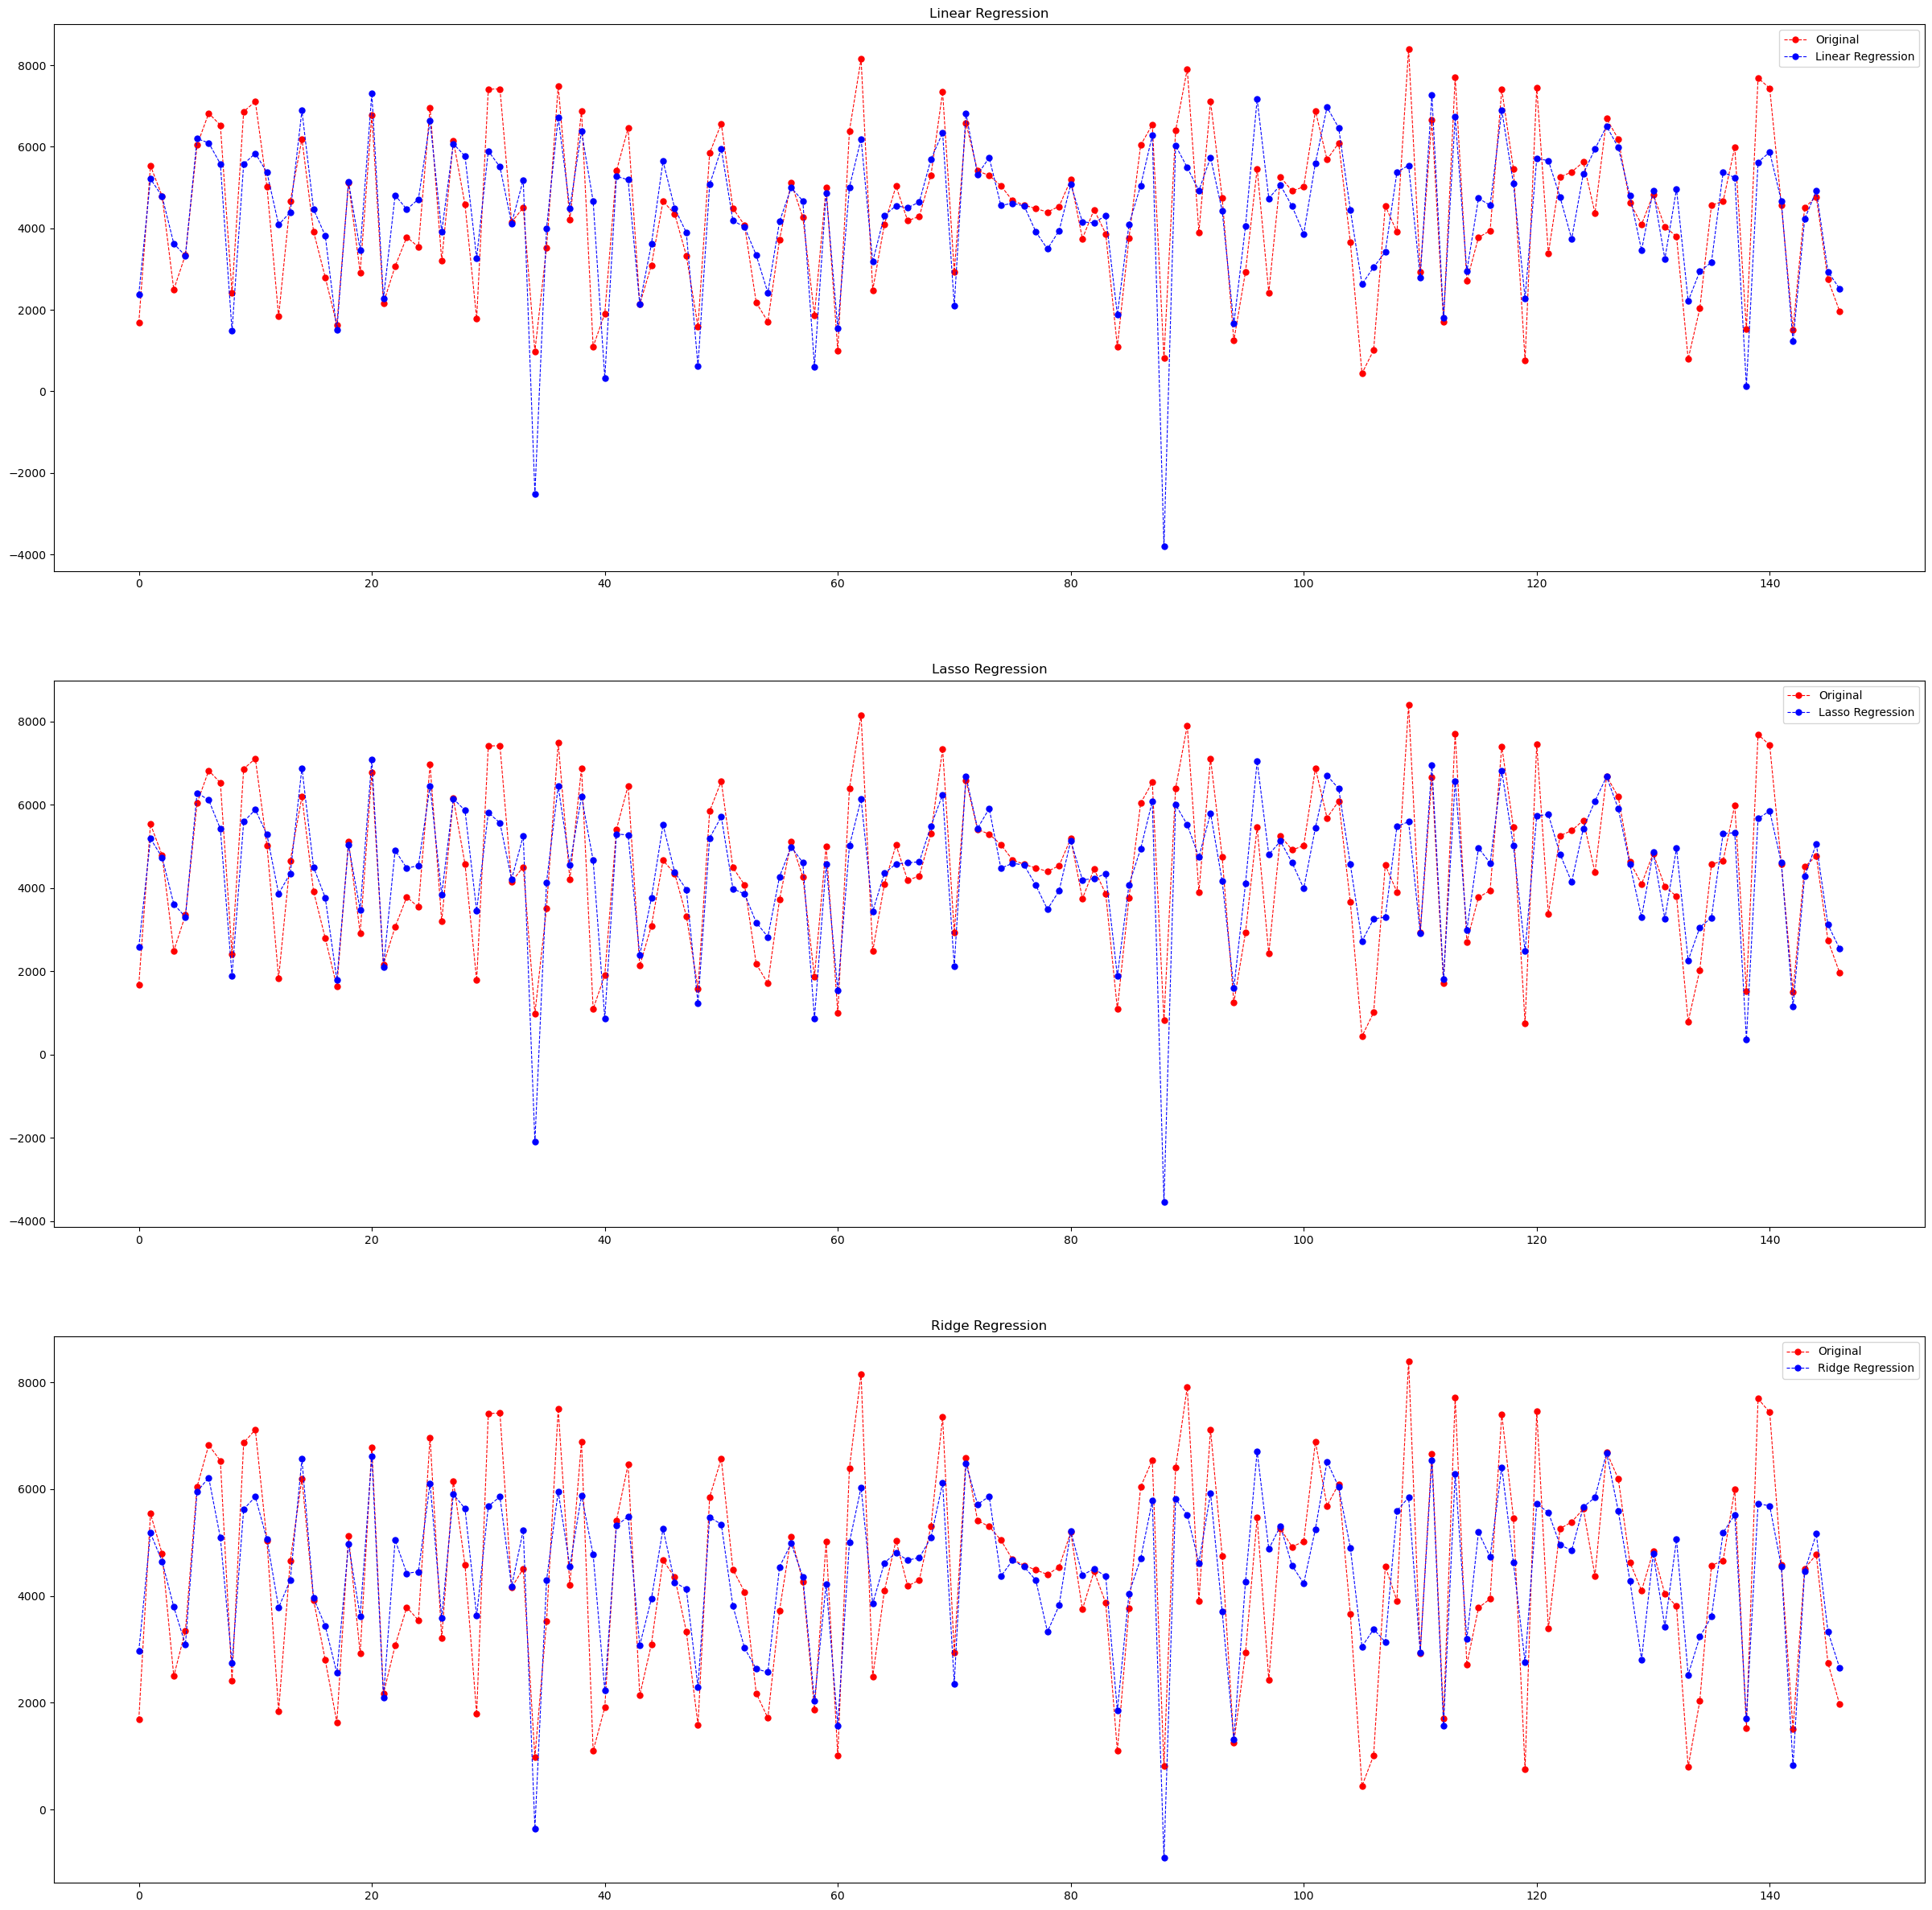

In [344]:
import matplotlib.pyplot as plt

# Comparison of All the regression Methods with Original Data
x = np.arange(len(y_test))
plt.figure(figsize=[30,30])
plt.subplot(3,1,1)
plt.title('Linear Regression')
plt.plot(x,y_test,'ro--',x,y_pred_linreg,'bo--',linewidth = 0.8, markersize = 5)
plt.legend(['Original','Linear Regression'],loc = 'upper right')
plt.subplot(3,1,2)
plt.title('Lasso Regression')
plt.plot(x,y_test,'ro--',x,y_pred_lasso,'bo--',linewidth = 0.8, markersize = 5)
plt.legend(['Original','Lasso Regression'],loc = 'upper right')
plt.subplot(3,1,3)
plt.title('Ridge Regression')
plt.plot(x,y_test,'ro--',x,y_pred_ridge,'bo--',linewidth = 0.8, markersize = 5)
plt.legend(['Original','Ridge Regression'],loc = 'upper right')
plt.show()

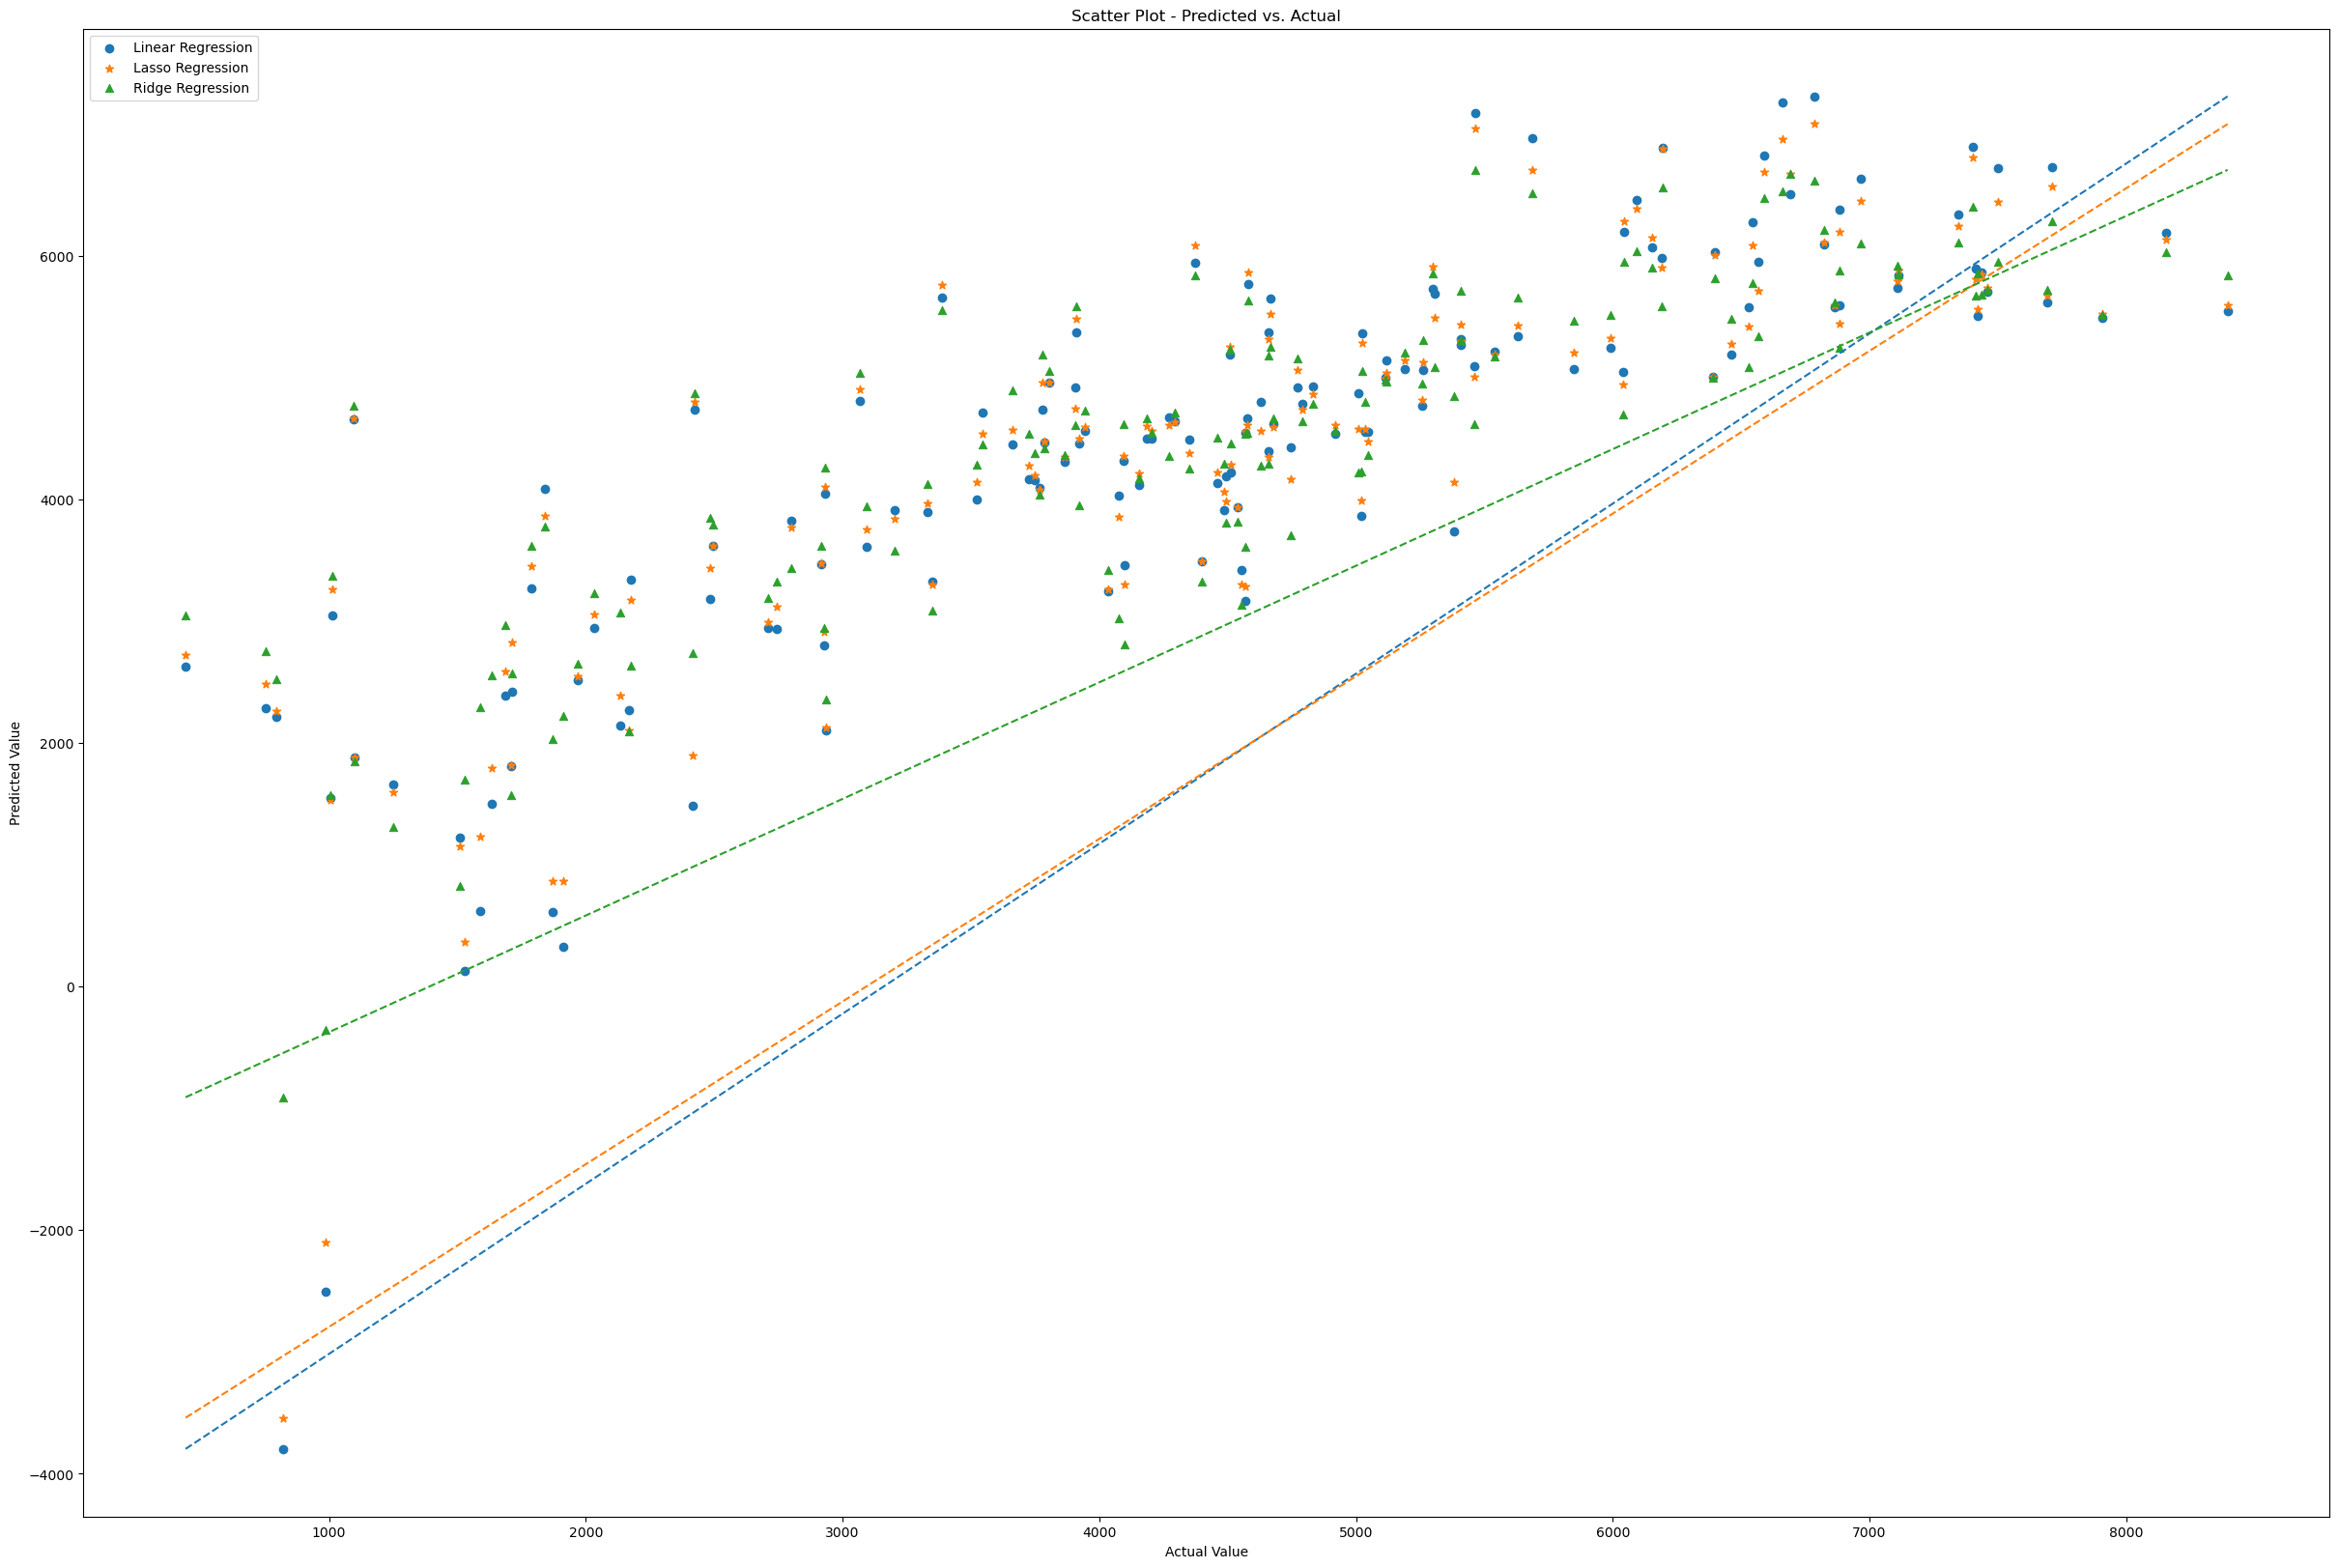

In [345]:
# Scatter Plot -> Predicted vs. Actual
plt.figure(figsize=[30,20])
plt.title('Scatter Plot - Predicted vs. Actual')
plt.scatter(y_test,y_pred_linreg,linewidths= 1,marker='o')
plt.scatter(y_test,y_pred_lasso,linewidths= 1,marker='*')
plt.scatter(y_test,y_pred_ridge,linewidths= 0.7,marker='^')
plt.plot([y_test.min(),y_test.max()],[y_pred_linreg.min(),y_pred_linreg.max()],'--')
plt.plot([y_test.min(),y_test.max()],[y_pred_lasso.min(),y_pred_lasso.max()],'--')
plt.plot([y_test.min(),y_test.max()],[y_pred_ridge.min(),y_pred_ridge.max()],'--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend(['Linear Regression','Lasso Regression','Ridge Regression'])
plt.show()

Residual Plot

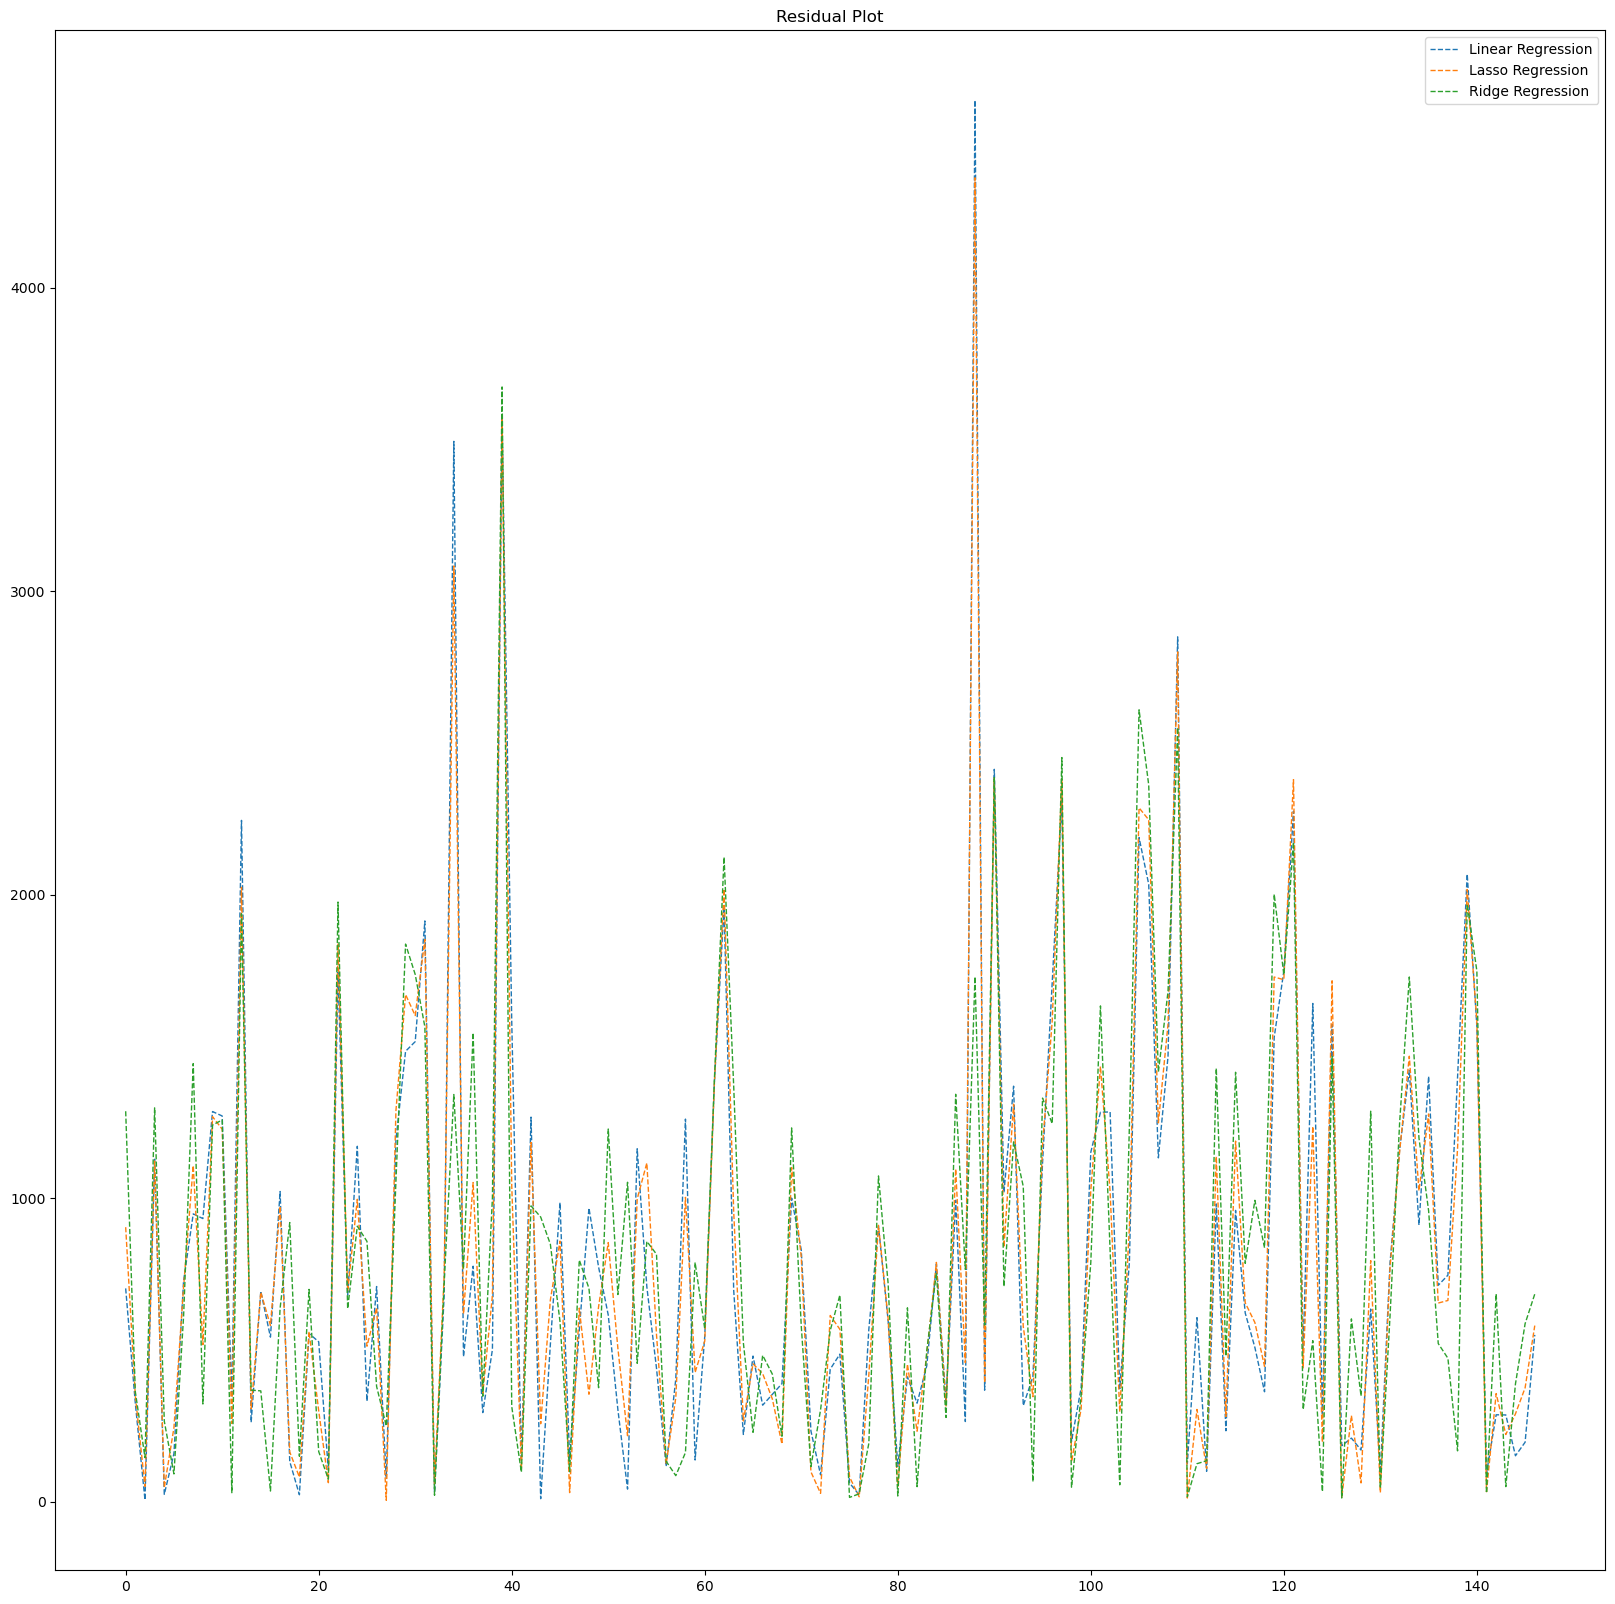

In [346]:
# Residual Plot
plt.figure(figsize=[20,20])
plt.title('Residual Plot')
plt.plot(x, np.abs(y_test-y_pred_linreg),'--',linewidth = 1)
plt.plot(x, np.abs(y_test-y_pred_lasso),'--',linewidth = 1)
plt.plot(x, np.abs(y_test-y_pred_ridge),'--',linewidth = 1)
plt.legend(['Linear Regression','Lasso Regression','Ridge Regression'])

Create a Dictionary to store Results

In [347]:
result_dict = {'model':['Linear Regression', 'Lasso','Ridge'],
               'MSE': [MSE_lin_reg, MSE_lasso,MSE_ridge],
               'R2 Score': [r2_lin_reg,r2_lasso,r2_ridge]}
print(pd.DataFrame(result_dict))

               model           MSE  R2 Score
0  Linear Regression  1.253677e+06  0.655516
1              Lasso  1.227898e+06  0.662599
2              Ridge  1.144175e+06  0.685604


Additional Data Preprocessing for Classification

In [348]:
sorted_prep_data = prep_Data.sort_values('cnt')

# Define the percentile-based thresholds
low_threshold = sorted_prep_data['cnt'].quantile(0.33)
med_threshold = sorted_prep_data['cnt'].quantile(0.66)

# Create a function to categorize the 'cnt' column based on thresholds
def categorize_cnt(value):
    if value <= low_threshold:
        return 'low'
    elif value <= med_threshold:
        return 'medium'
    else:
        return 'high'

# Apply the function to the 'cnt' column
sorted_prep_data['cnt_classes'] = sorted_prep_data['cnt'].apply(categorize_cnt)


# Specifying Target and features -> Feature remains same
targets = sorted_prep_data['cnt_classes']
targets
sorted_prep_data
print(features)



[[0.15263034 0.         0.15263034 ... 0.05550021 0.12299457 0.02448893]
 [0.38338226 0.         0.38338226 ... 0.13561726 0.2668674  0.09528544]
 [0.43325791 0.         0.43325791 ... 0.08206121 0.18945199 0.10758184]
 ...
 [0.07318493 0.07318493 0.87821921 ... 0.01774003 0.05510218 0.00910296]
 [0.08234546 0.08234546 0.98814551 ... 0.01907944 0.03980028 0.028883  ]
 [0.08098985 0.08098985 0.97187814 ... 0.01810018 0.04677164 0.01254095]]


In [349]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size= 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train)
print(y_test)

(584, 11)
(147, 11)
614      high
634      high
117    medium
300    medium
324       low
        ...  
585      high
182    medium
469      high
677      high
394       low
Name: cnt_classes, Length: 584, dtype: object
365       low
9         low
12        low
462      high
697    medium
        ...  
305    medium
179    medium
509      high
701    medium
250       low
Name: cnt_classes, Length: 147, dtype: object


Logistic Regression

In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score,precision_score,recall_score

# As its not a Binary Classification problem - precision, recall and auc_scores are not valid for multiple classes
# Define a method that can find the mentioned metrics for each classes
def find_metrics(y_test, y_pred, target_category):
    y_test_cat = y_test == target_category
    y_pred_cat = y_pred == target_category
    precision = precision_score(y_test_cat,y_pred_cat)
    recall = recall_score(y_test_cat,y_pred_cat)
    auc_score = roc_auc_score(y_test_cat,y_pred_cat)
    F1_score = 2*precision*recall/(precision+recall)
    return precision, recall, auc_score, F1_score

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred_log_reg = log_reg.predict(x_test)

accuracy_log_reg = accuracy_score(y_test,y_pred_log_reg) # Accuracy
print(f'Accuracy of Logistic Regression: {accuracy_log_reg}\n')

precision_log_reg_low, recall_log_reg_low, auc_score_log_reg_low, F1_score_log_reg_low = find_metrics(y_test,y_pred_log_reg,'low')
precision_log_reg_med, recall_log_reg_med, auc_score_log_reg_med, F1_score_log_reg_med = find_metrics(y_test,y_pred_log_reg,'medium')
precision_log_reg_high, recall_log_reg_high, auc_score_log_reg_high, F1_score_log_reg_high = find_metrics(y_test,y_pred_log_reg,'high')

log_reg_dict = {'Cagtagory':['low', 'medium','high'],
               'precision': [precision_log_reg_low, precision_log_reg_med,precision_log_reg_high],
               'Recall': [recall_log_reg_low,recall_log_reg_med,recall_log_reg_high],
               'AUC_Score':[auc_score_log_reg_low,auc_score_log_reg_med,auc_score_log_reg_high],
               'F1 - Score': [F1_score_log_reg_low, F1_score_log_reg_med, F1_score_log_reg_high]}
print(pd.DataFrame(log_reg_dict))

Accuracy of Logistic Regression: 0.7278911564625851

  Cagtagory  precision    Recall  AUC_Score  F1 - Score
0       low   0.913043  0.913043   0.936720    0.913043
1    medium   0.774194  0.452830   0.689181    0.571429
2      high   0.585714  0.854167   0.780619    0.694915


K-Nearest Neighbour K = 5

In [351]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors= 5)
Knn.fit(x_train,y_train)
y_pred_knn5 = Knn.predict(x_test)

accuracy_knn5 = accuracy_score(y_test,y_pred_knn5) # Accuracy
print(f'Accuracy of K-Nearest Neighbors with K = 5: {accuracy_knn5}\n')

precision_knn5_low, recall_knn5_low, auc_score_knn5_low, F1_score_knn5_low = find_metrics(y_test,y_pred_knn5,'low')
precision_knn5_med, recall_knn5_med, auc_score_knn5_med, F1_score_knn5_med = find_metrics(y_test,y_pred_knn5,'medium')
precision_knn5_high, recall_knn5_high, auc_score_knn5_high, F1_score_knn5_high = find_metrics(y_test,y_pred_knn5,'high')


knn5_dict = {'Cagtagory':['low', 'medium','high'],
               'precision': [precision_knn5_low, precision_knn5_med, precision_knn5_high],
               'Recall': [recall_knn5_low, recall_knn5_med, recall_knn5_high],
               'AUC_Score':[auc_score_knn5_low, auc_score_knn5_med, auc_score_knn5_high],
               'F1 - Score': [F1_score_knn5_low, F1_score_knn5_med, F1_score_knn5_high]}
print(pd.DataFrame(knn5_dict))

Accuracy of K-Nearest Neighbors with K = 5: 0.9251700680272109

  Cagtagory  precision    Recall  AUC_Score  F1 - Score
0       low   0.938776  1.000000   0.985149    0.968421
1    medium   0.920000  0.867925   0.912686    0.893204
2      high   0.916667  0.916667   0.938131    0.916667


K-Nearest Neighbour K = 15

In [352]:
Knn = KNeighborsClassifier(n_neighbors= 15)
Knn.fit(x_train,y_train)
y_pred_knn15 = Knn.predict(x_test)

accuracy_knn15 = accuracy_score(y_test,y_pred_knn15) # Accuracy
print(f'Accuracy of K-Nearest Neighbors with K = 15: {accuracy_knn15}\n')

precision_knn15_low, recall_knn15_low, auc_score_knn15_low, F1_score_knn15_low = find_metrics(y_test,y_pred_knn15,'low')
precision_knn15_med, recall_knn15_med, auc_score_knn15_med, F1_score_knn15_med = find_metrics(y_test,y_pred_knn15,'medium')
precision_knn15_high, recall_knn15_high, auc_score_knn15_high, F1_score_knn15_high = find_metrics(y_test,y_pred_knn15,'high')


knn15_dict = {'Cagtagory':['low', 'medium','high'],
               'precision': [precision_knn15_low, precision_knn15_med, precision_knn15_high],
               'Recall': [recall_knn15_low, recall_knn15_med, recall_knn15_high],
               'AUC_Score':[auc_score_knn15_low, auc_score_knn15_med, auc_score_knn15_high],
               'F1 - Score': [F1_score_knn15_low, F1_score_knn15_med, F1_score_knn15_high]}
print(pd.DataFrame(knn15_dict))

Accuracy of K-Nearest Neighbors with K = 15: 0.9115646258503401

  Cagtagory  precision    Recall  AUC_Score  F1 - Score
0       low   0.882353  0.978261   0.959427    0.927835
1    medium   0.954545  0.792453   0.885588    0.865979
2      high   0.903846  0.979167   0.964331    0.940000


Random Forest Classification with n_estimators = 50

Accuracy of Random Forest with n_estimator = 50: 0.9863945578231292

  Cagtagory  precision    Recall  AUC_Score  F1 - Score
0       low   1.000000  1.000000   1.000000    1.000000
1    medium   0.963636  1.000000   0.989362    0.981481
2      high   1.000000  0.958333   0.979167    0.978723


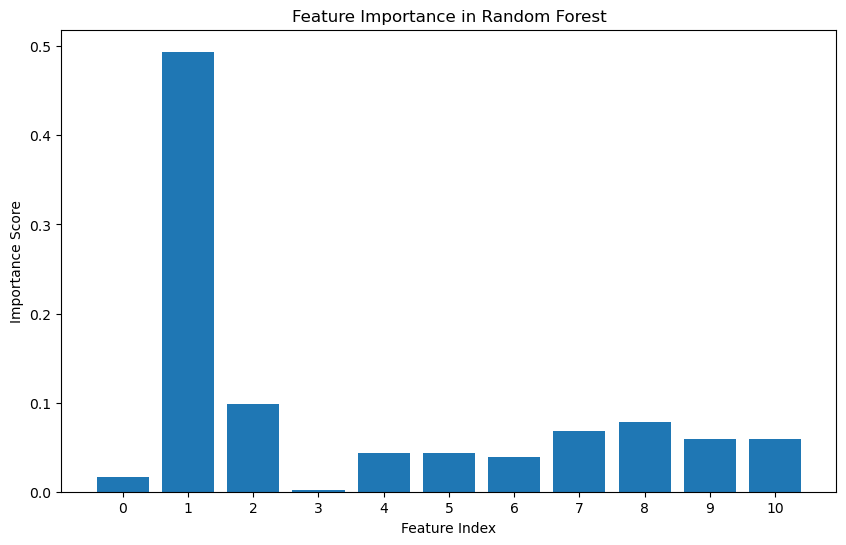

In [353]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)
y_pred_rf50 = rf.predict(x_test)

accuracy_rf50 = accuracy_score(y_test,y_pred_rf50) # Accuracy
print(f'Accuracy of Random Forest with n_estimator = 50: {accuracy_rf50}\n')

precision_rf50_low, recall_rf50_low, auc_score_rf50_low,F1_score_rf50_low = find_metrics(y_test,y_pred_rf50,'low')
precision_rf50_med, recall_rf50_med, auc_score_rf50_med,F1_score_rf50_med = find_metrics(y_test,y_pred_rf50,'medium')
precision_rf50_high, recall_rf50_high, auc_score_rf50_high,F1_score_rf50_high = find_metrics(y_test,y_pred_rf50,'high')


rf50_dict = {'Cagtagory':['low', 'medium','high'],
               'precision': [precision_rf50_low, precision_rf50_med, precision_rf50_high],
               'Recall': [recall_rf50_low, recall_rf50_med, recall_rf50_high],
               'AUC_Score':[auc_score_rf50_low, auc_score_rf50_med, auc_score_rf50_high],
               'F1 - Score': [F1_score_rf50_low, F1_score_rf50_med, F1_score_rf50_high]}
print(pd.DataFrame(rf50_dict))

# Feature Importance Plot
importances = rf.feature_importances_
# indices = np.argsort(importances)[::-1]
indices = np.arange(features.shape[1])
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(features.shape[1]), importances[indices], align='center')
plt.xticks(range(features.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.show()


Random Forest Classification with n_estimators = 20

Accuracy of Random Forest with n_estimator = 20: 0.9863945578231292

  Cagtagory  precision    Recall  AUC_Score  F1 - Score
0       low   1.000000  1.000000   1.000000    1.000000
1    medium   0.963636  1.000000   0.989362    0.981481
2      high   1.000000  0.958333   0.979167    0.978723


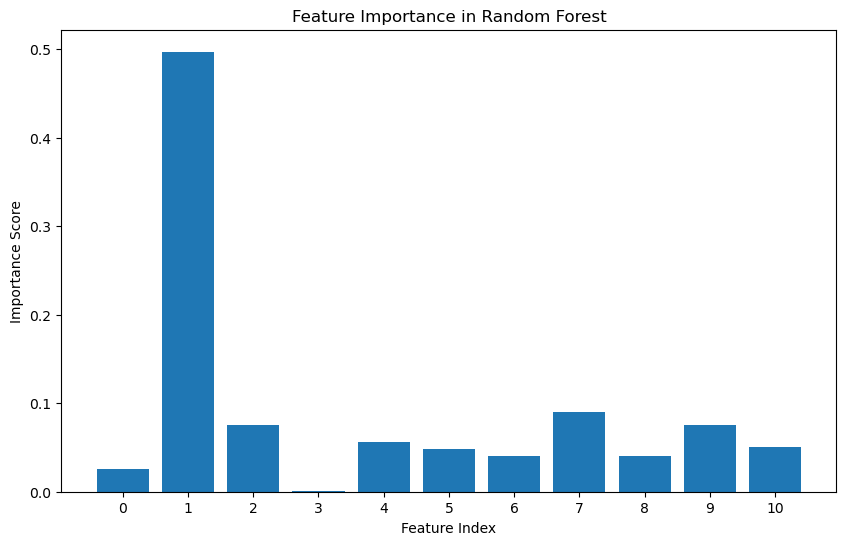

In [354]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)
y_pred_rf20 = rf.predict(x_test)

accuracy_rf20 = accuracy_score(y_test,y_pred_rf20) # Accuracy
print(f'Accuracy of Random Forest with n_estimator = 20: {accuracy_rf20}\n')

precision_rf20_low, recall_rf20_low, auc_score_rf20_low, F1_score_rf20_low = find_metrics(y_test,y_pred_rf20,'low')
precision_rf20_med, recall_rf20_med, auc_score_rf20_med, F1_score_rf20_med = find_metrics(y_test,y_pred_rf20,'medium')
precision_rf20_high, recall_rf20_high, auc_score_rf20_high, F1_score_rf20_high = find_metrics(y_test,y_pred_rf20,'high')


rf20_dict = {'Cagtagory':['low', 'medium','high'],
               'precision': [precision_rf20_low, precision_rf20_med, precision_rf20_high],
               'Recall': [recall_rf20_low, recall_rf20_med, recall_rf20_high],
               'AUC_Score':[auc_score_rf20_low, auc_score_rf20_med, auc_score_rf20_high],
               'F1 - Score': [F1_score_rf20_low, F1_score_rf20_med, F1_score_rf20_high]}
print(pd.DataFrame(rf20_dict))

# Feature Importance Plot
importances = rf.feature_importances_
# indices = np.argsort(importances)[::-1]
indices = np.arange(features.shape[1])
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(features.shape[1]), importances[indices], align='center')
plt.xticks(range(features.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.show()


Support Vector Machine with linear Kernel

In [355]:
from sklearn.svm import SVC
svm = SVC(kernel= 'linear')
svm.fit(x_train,y_train)
y_pred_svm_lin = svm.predict(x_test)

accuracy_svm_lin = accuracy_score(y_test,y_pred_svm_lin) # Accuracy
print(f'Accuracy of Support Vector Machine with Linear Kernel: {accuracy_svm_lin}\n')

precision_svm_lin_low, recall_svm_lin_low, auc_score_svm_lin_low,F1_score_svm_lin_low = find_metrics(y_test,y_pred_svm_lin,'low')
precision_svm_lin_med, recall_svm_lin_med, auc_score_svm_lin_med, F1_score_svm_lin_med = find_metrics(y_test,y_pred_svm_lin,'medium')
precision_svm_lin_high, recall_svm_lin_high, auc_score_svm_lin_high, F1_score_svm_lin_high = find_metrics(y_test,y_pred_svm_lin,'high')


svm_lin_dict = {'Cagtagory':['low', 'medium','high'],
               'precision': [precision_svm_lin_low, precision_svm_lin_med, precision_svm_lin_high],
               'Recall': [recall_svm_lin_low, recall_svm_lin_med, recall_svm_lin_high],
               'AUC_Score':[auc_score_svm_lin_low, auc_score_svm_lin_med, auc_score_svm_lin_high],
               'F1 - Score': [F1_score_svm_lin_low, F1_score_svm_lin_med, F1_score_svm_lin_high]}
print(pd.DataFrame(svm_lin_dict))


Accuracy of Support Vector Machine with Linear Kernel: 0.7482993197278912

  Cagtagory  precision    Recall  AUC_Score  F1 - Score
0       low   0.914894  0.934783   0.947589    0.924731
1    medium   0.952381  0.377358   0.683360    0.540541
2      high   0.594937  0.979167   0.827967    0.740157


Support Vector Machine with RBF Kernal

In [356]:
svm = SVC(kernel= 'rbf')
svm.fit(x_train,y_train)
y_pred_svm_rbf = svm.predict(x_test)

accuracy_svm_rbf = accuracy_score(y_test,y_pred_svm_rbf) # Accuracy
print(f'Accuracy of Support Vector Machine with RBF Kernel: {accuracy_svm_rbf}\n')

precision_svm_rbf_low, recall_svm_rbf_low, auc_score_svm_rbf_low, F1_score_svm_rbf_low = find_metrics(y_test,y_pred_svm_rbf,'low')
precision_svm_rbf_med, recall_svm_rbf_med, auc_score_svm_rbf_med, F1_score_svm_rbf_med = find_metrics(y_test,y_pred_svm_rbf,'medium')
precision_svm_rbf_high, recall_svm_rbf_high, auc_score_svm_rbf_high, F1_score_svm_rbf_high = find_metrics(y_test,y_pred_svm_rbf,'high')


svm_rbf_dict = {'Cagtagory':['low', 'medium','high'],
               'precision': [precision_svm_rbf_low, precision_svm_rbf_med, precision_svm_rbf_high],
               'Recall': [recall_svm_rbf_low, recall_svm_rbf_med, recall_svm_rbf_high],
               'AUC_Score':[auc_score_svm_rbf_low, auc_score_svm_rbf_med, auc_score_svm_rbf_high],
               'F1 - Score': [F1_score_svm_rbf_low, F1_score_svm_rbf_med, F1_score_svm_rbf_high]}
print(pd.DataFrame(svm_rbf_dict))

Accuracy of Support Vector Machine with RBF Kernel: 0.9183673469387755

  Cagtagory  precision    Recall  AUC_Score  F1 - Score
0       low   0.957447  0.978261   0.979229    0.967742
1    medium   0.955556  0.811321   0.895022    0.877551
2      high   0.854545  0.979167   0.949179    0.912621


Table With All the Classification Results

In [357]:
result_dict = {
    'Logistic Regression':{
        'Accuracy': accuracy_log_reg,
        'low':{
            'precison': precision_log_reg_low,
            'recall': recall_log_reg_low,
            'AUC Score': auc_score_log_reg_low  
        },
        'medium':{
            'precison': precision_log_reg_med,
            'recall': recall_log_reg_med,
            'AUC Score': auc_score_log_reg_med 
        },
        'high':{
            'precison': precision_log_reg_high,
            'recall': recall_log_reg_high,
            'AUC Score': auc_score_log_reg_high   
        }
    },

    'K-Nearest Neighbor 5':{
        'Accuracy': accuracy_knn5,
        'low':{
            'precison': precision_knn5_low,
            'recall': recall_knn5_low,
            'AUC Score': auc_score_knn5_low   
        },
        'medium':{
            'precison': precision_knn5_med,
            'recall': recall_knn5_med,
            'AUC Score': auc_score_knn5_med   
        },
        'high':{
            'precison': precision_knn5_high,
            'recall': recall_knn5_high,
            'AUC Score': auc_score_knn5_high   
        }
    },
    'K-Nearest Neighbor 15':{
        'Accuracy': accuracy_knn15,
        'low':{
            'precison': precision_knn15_low,
            'recall': recall_knn15_low,
            'AUC Score': auc_score_knn15_low   
        },
        'medium':{
            'precison': precision_knn15_med,
            'recall': recall_knn15_med,
            'AUC Score': auc_score_knn15_med   
        },
        'high':{
            'precison': precision_knn15_high,
            'recall': recall_knn15_high,
            'AUC Score': auc_score_knn15_high   
        }
    },
        'Random Forest 50':{
        'Accuracy': accuracy_rf50,
        'low':{
            'precison': precision_rf50_low,
            'recall': recall_rf50_low,
            'AUC Score': auc_score_rf50_low   
        },
        'medium':{
            'precison': precision_rf50_med,
            'recall': recall_rf50_med,
            'AUC Score': auc_score_rf50_med   
        },
        'high':{
            'precison': precision_rf50_high,
            'recall': recall_rf50_high,
            'AUC Score': auc_score_rf50_high   
        }
    },
    'Random Forest 20':{
        'Accuracy': accuracy_rf20,
        'low':{
            'precison': precision_rf20_low,
            'recall': recall_rf20_low,
            'AUC Score': auc_score_rf20_low   
        },
        'medium':{
            'precison': precision_rf20_med,
            'recall': recall_rf20_med,
            'AUC Score': auc_score_rf20_med   
        },
        'high':{
            'precison': precision_rf20_high,
            'recall': recall_rf20_high,
            'AUC Score': auc_score_rf20_high   
        }
    },
        'Support Vector Machine Linear':{
        'Accuracy': accuracy_svm_lin,
        'low':{
            'precison': precision_svm_lin_low,
            'recall': recall_svm_lin_low,
            'AUC Score': auc_score_svm_lin_low   
        },
        'medium':{
            'precison': precision_svm_lin_med,
            'recall': recall_svm_lin_med,
            'AUC Score': auc_score_svm_lin_med   
        },
        'high':{
            'precison': precision_svm_lin_high,
            'recall': recall_svm_lin_high,
            'AUC Score': auc_score_svm_lin_high   
        }
    },
     'Support Vector Machine RBF':{
        'Accuracy': accuracy_svm_rbf,
        'low':{
            'precison': precision_svm_rbf_low,
            'recall': recall_svm_rbf_low,
            'AUC Score': auc_score_svm_rbf_low   
        },
        'medium':{
            'precison': precision_svm_rbf_med,
            'recall': recall_svm_rbf_med,
            'AUC Score': auc_score_svm_rbf_med   
        },
        'high':{
            'precison': precision_svm_rbf_high,
            'recall': recall_svm_rbf_high,
            'AUC Score': auc_score_svm_rbf_high   
        }
    }
}

pd.DataFrame(result_dict)

,Logistic Regression,K-Nearest Neighbor 5,K-Nearest Neighbor 15,Random Forest 50,Random Forest 20,Support Vector Machine Linear,Support Vector Machine RBF
Accuracy,0.727891,0.92517,0.911565,0.986395,0.986395,0.748299,0.918367
low,"{'precison': 0.9130434782608695, 'recall': 0.9...","{'precison': 0.9387755102040817, 'recall': 1.0...","{'precison': 0.8823529411764706, 'recall': 0.9...","{'precison': 1.0, 'recall': 1.0, 'AUC Score': ...","{'precison': 1.0, 'recall': 1.0, 'AUC Score': ...","{'precison': 0.9148936170212766, 'recall': 0.9...","{'precison': 0.9574468085106383, 'recall': 0.9..."
medium,"{'precison': 0.7741935483870968, 'recall': 0.4...","{'precison': 0.92, 'recall': 0.867924528301886...","{'precison': 0.9545454545454546, 'recall': 0.7...","{'precison': 0.9636363636363636, 'recall': 1.0...","{'precison': 0.9636363636363636, 'recall': 1.0...","{'precison': 0.9523809523809523, 'recall': 0.3...","{'precison': 0.9555555555555556, 'recall': 0.8..."
high,"{'precison': 0.5857142857142857, 'recall': 0.8...","{'precison': 0.9166666666666666, 'recall': 0.9...","{'precison': 0.9038461538461539, 'recall': 0.9...","{'precison': 1.0, 'recall': 0.9583333333333334...","{'precison': 1.0, 'recall': 0.9583333333333334...","{'precison': 0.5949367088607594, 'recall': 0.9...","{'precison': 0.8545454545454545, 'recall': 0.9..."


Confusion Metrics For the Classification Methods

In [358]:
from sklearn.metrics import confusion_matrix

# Logistic Regression
conf_mat = confusion_matrix(y_test,y_pred_log_reg)
print(f'Confusion Matrix for Logistic Regression:\n {conf_mat}')

# KNN 5
conf_mat = confusion_matrix(y_test,y_pred_knn5)
print(f'Confusion Matrix for K-Nearest Neighbor with 5 neighbors:\n {conf_mat}')

# KNN 15
conf_mat = confusion_matrix(y_test,y_pred_knn15)
print(f'Confusion Matrix for K-Nearest Neighbor with 15 neighbors:\n {conf_mat}')

# Random Forest with 50 estimators
conf_mat = confusion_matrix(y_test,y_pred_rf50)
print(f'Confusion Matrix for Random Forest with 50 estimators:\n {conf_mat}')

# Random Forest with 20 estimators
conf_mat = confusion_matrix(y_test,y_pred_rf20)
print(f'Confusion Matrix for Random Forest with 20 estimators:\n {conf_mat}')

# SVM Linear
conf_mat = confusion_matrix(y_test,y_pred_svm_lin)
print(f'Confusion Matrix for SVM with linear Kernel:\n {conf_mat}')

# SVM Linear
conf_mat = confusion_matrix(y_test,y_pred_svm_rbf)
print(f'Confusion Matrix for SVM with RBF Kernel:\n {conf_mat}')

Confusion Matrix for Logistic Regression:
 [[41  0  7]
 [ 4 42  0]
 [25  4 24]]
Confusion Matrix for K-Nearest Neighbor with 5 neighbors:
 [[44  0  4]
 [ 0 46  0]
 [ 4  3 46]]
Confusion Matrix for K-Nearest Neighbor with 15 neighbors:
 [[47  0  1]
 [ 0 45  1]
 [ 5  6 42]]
Confusion Matrix for Random Forest with 50 estimators:
 [[46  0  2]
 [ 0 46  0]
 [ 0  0 53]]
Confusion Matrix for Random Forest with 20 estimators:
 [[46  0  2]
 [ 0 46  0]
 [ 0  0 53]]
Confusion Matrix for SVM with linear Kernel:
 [[47  0  1]
 [ 3 43  0]
 [29  4 20]]
Confusion Matrix for SVM with RBF Kernel:
 [[47  0  1]
 [ 0 45  1]
 [ 8  2 43]]


ROC Curves for Classification

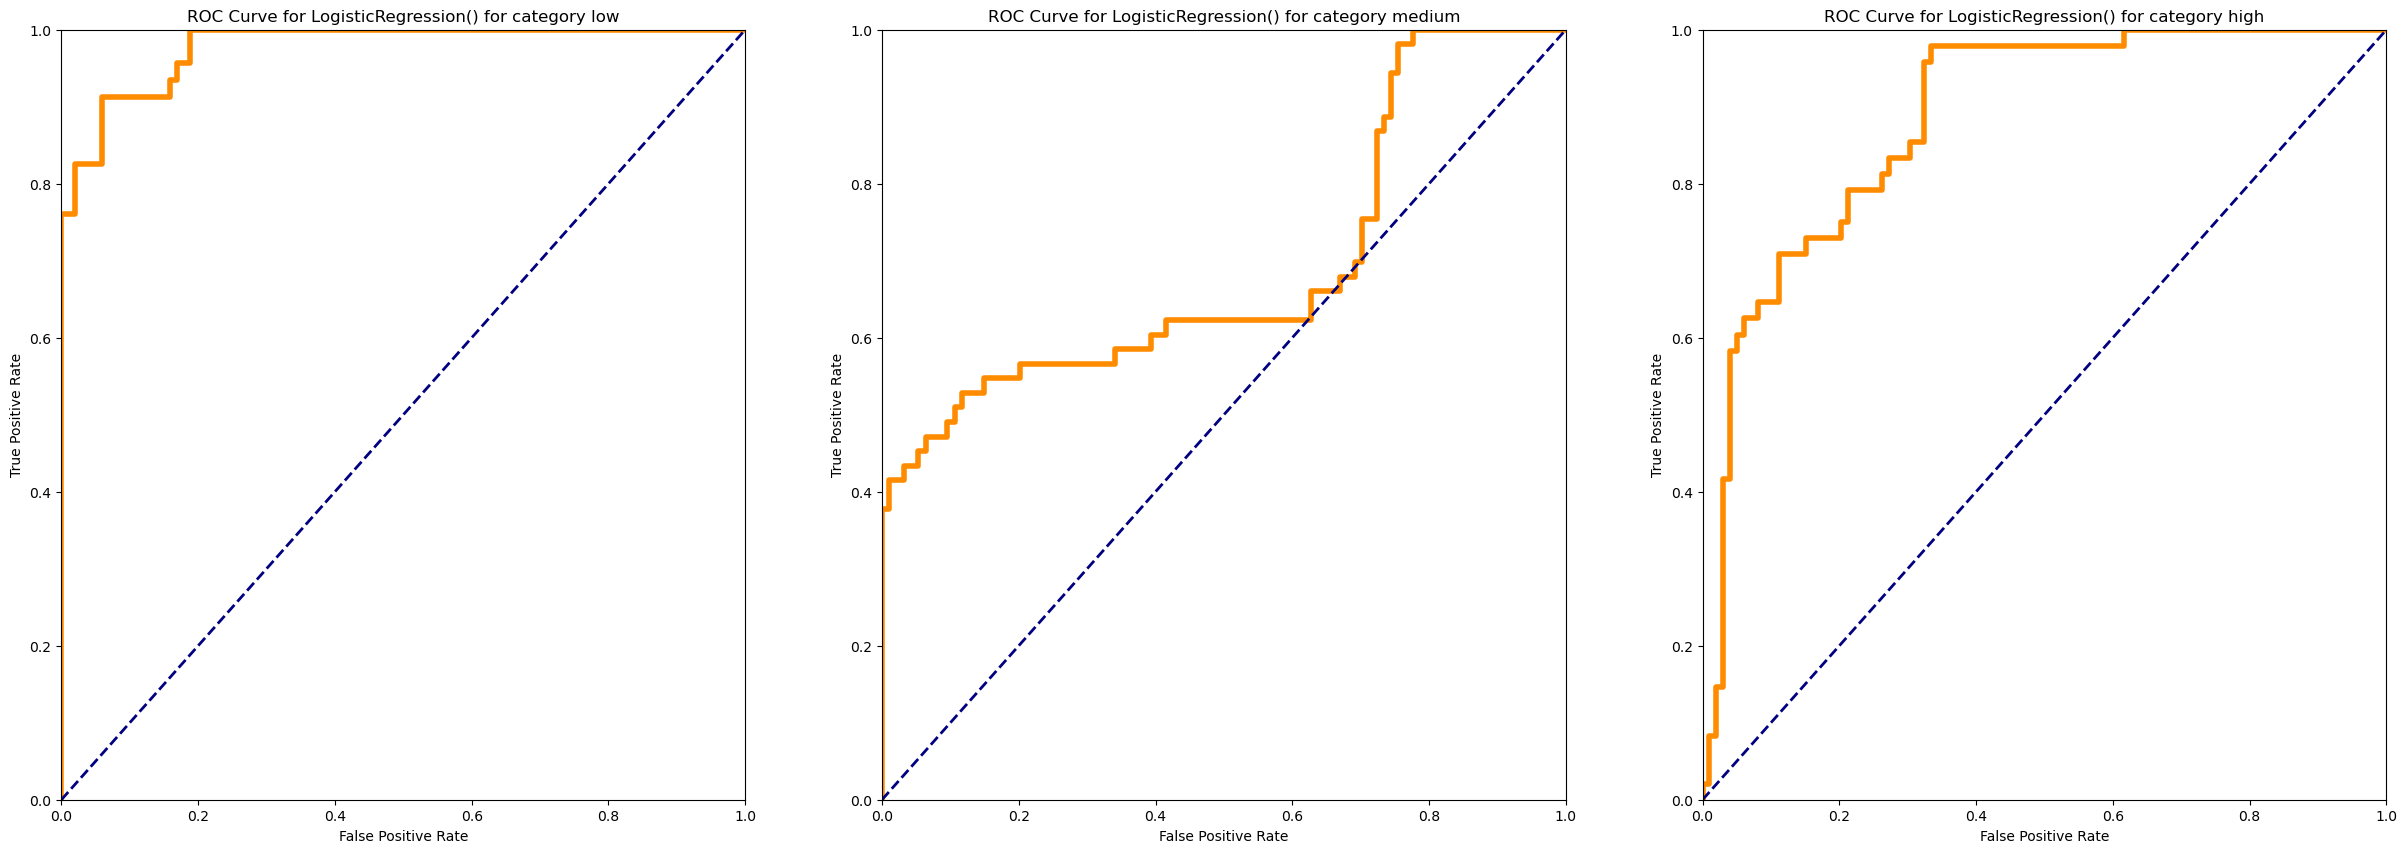

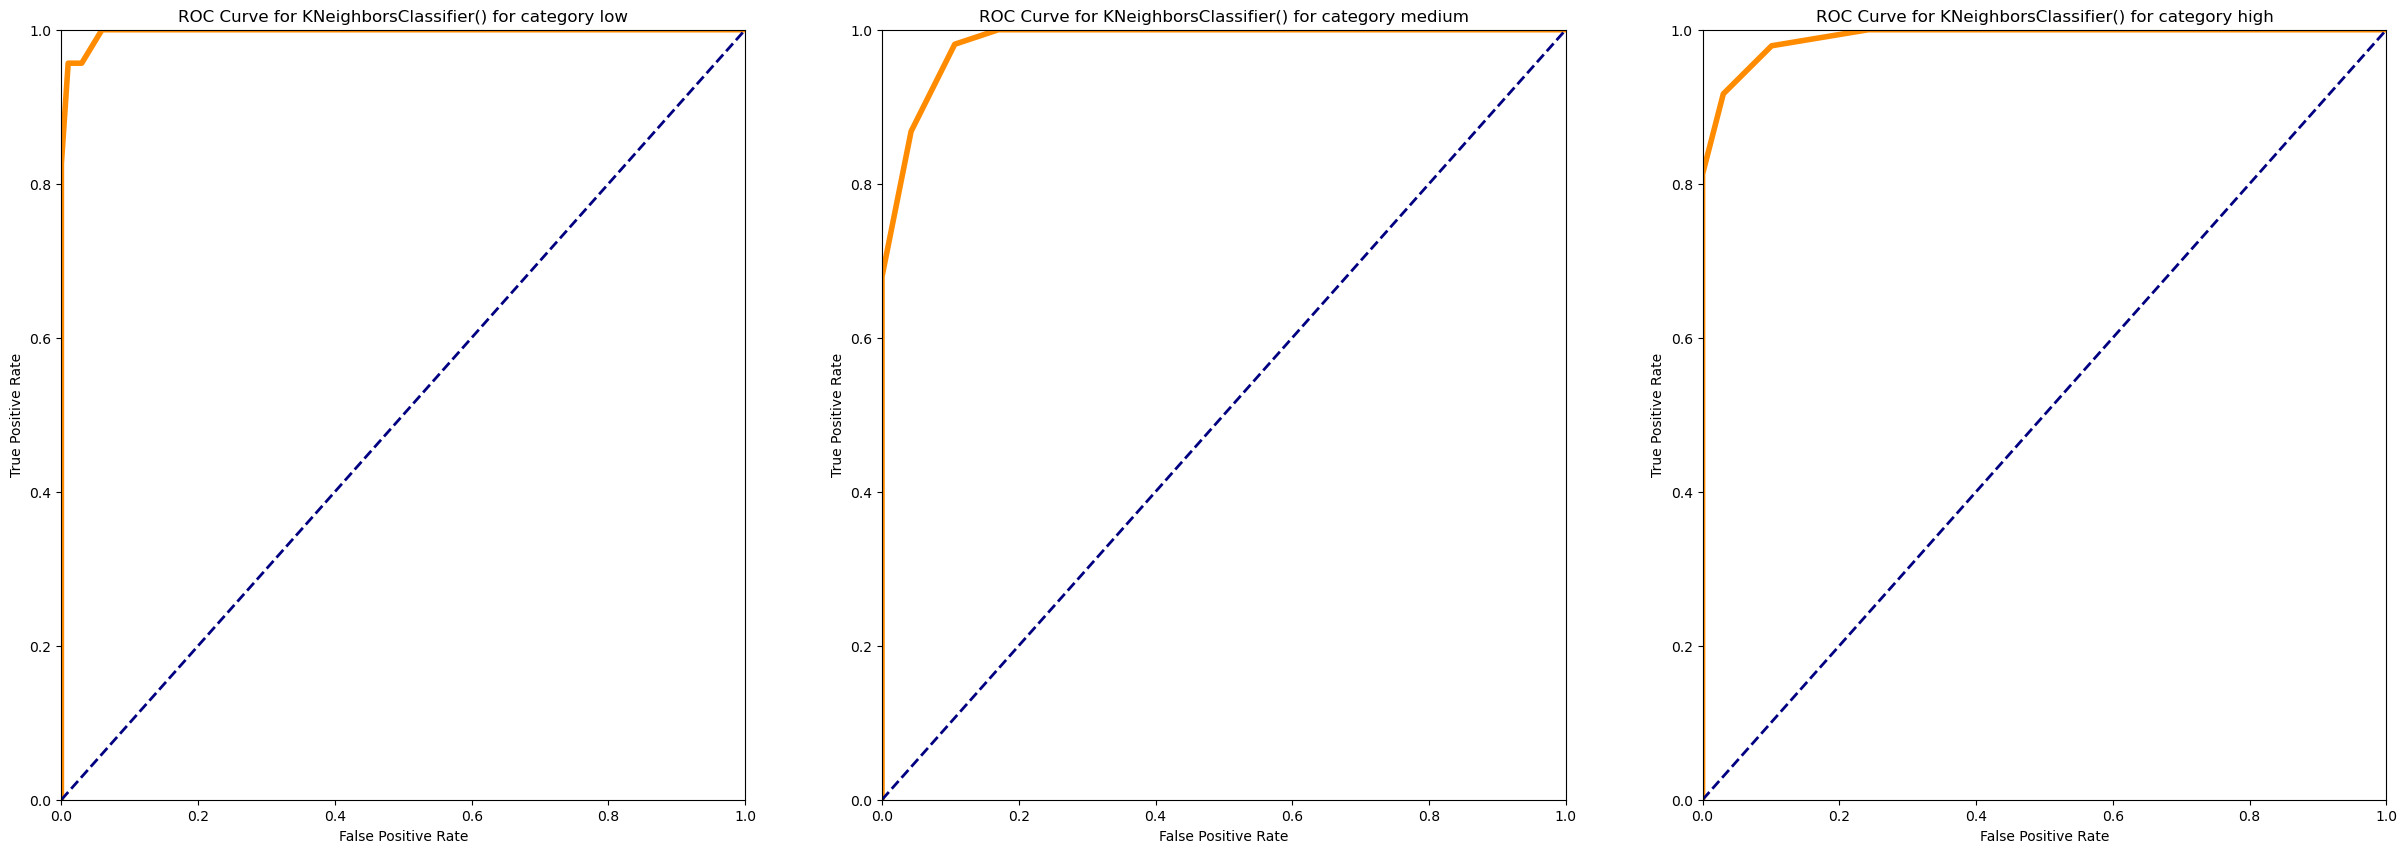

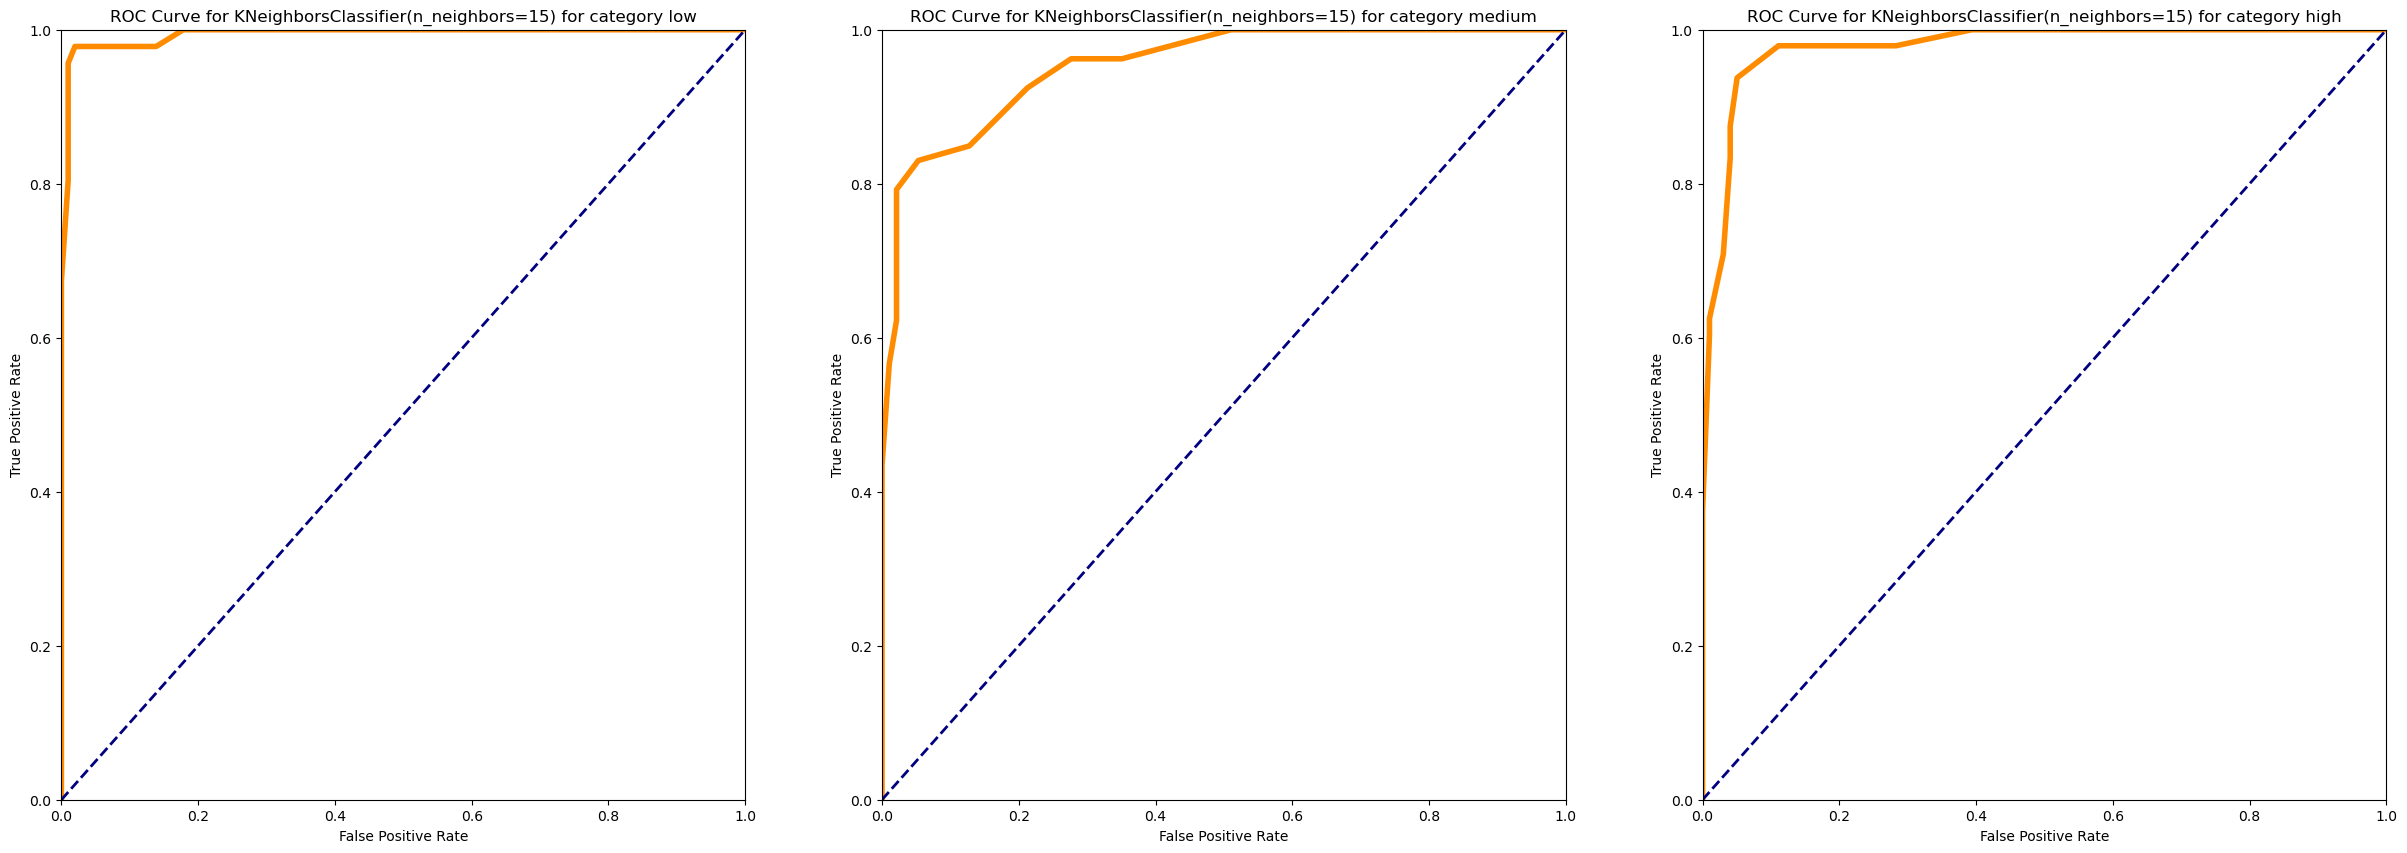

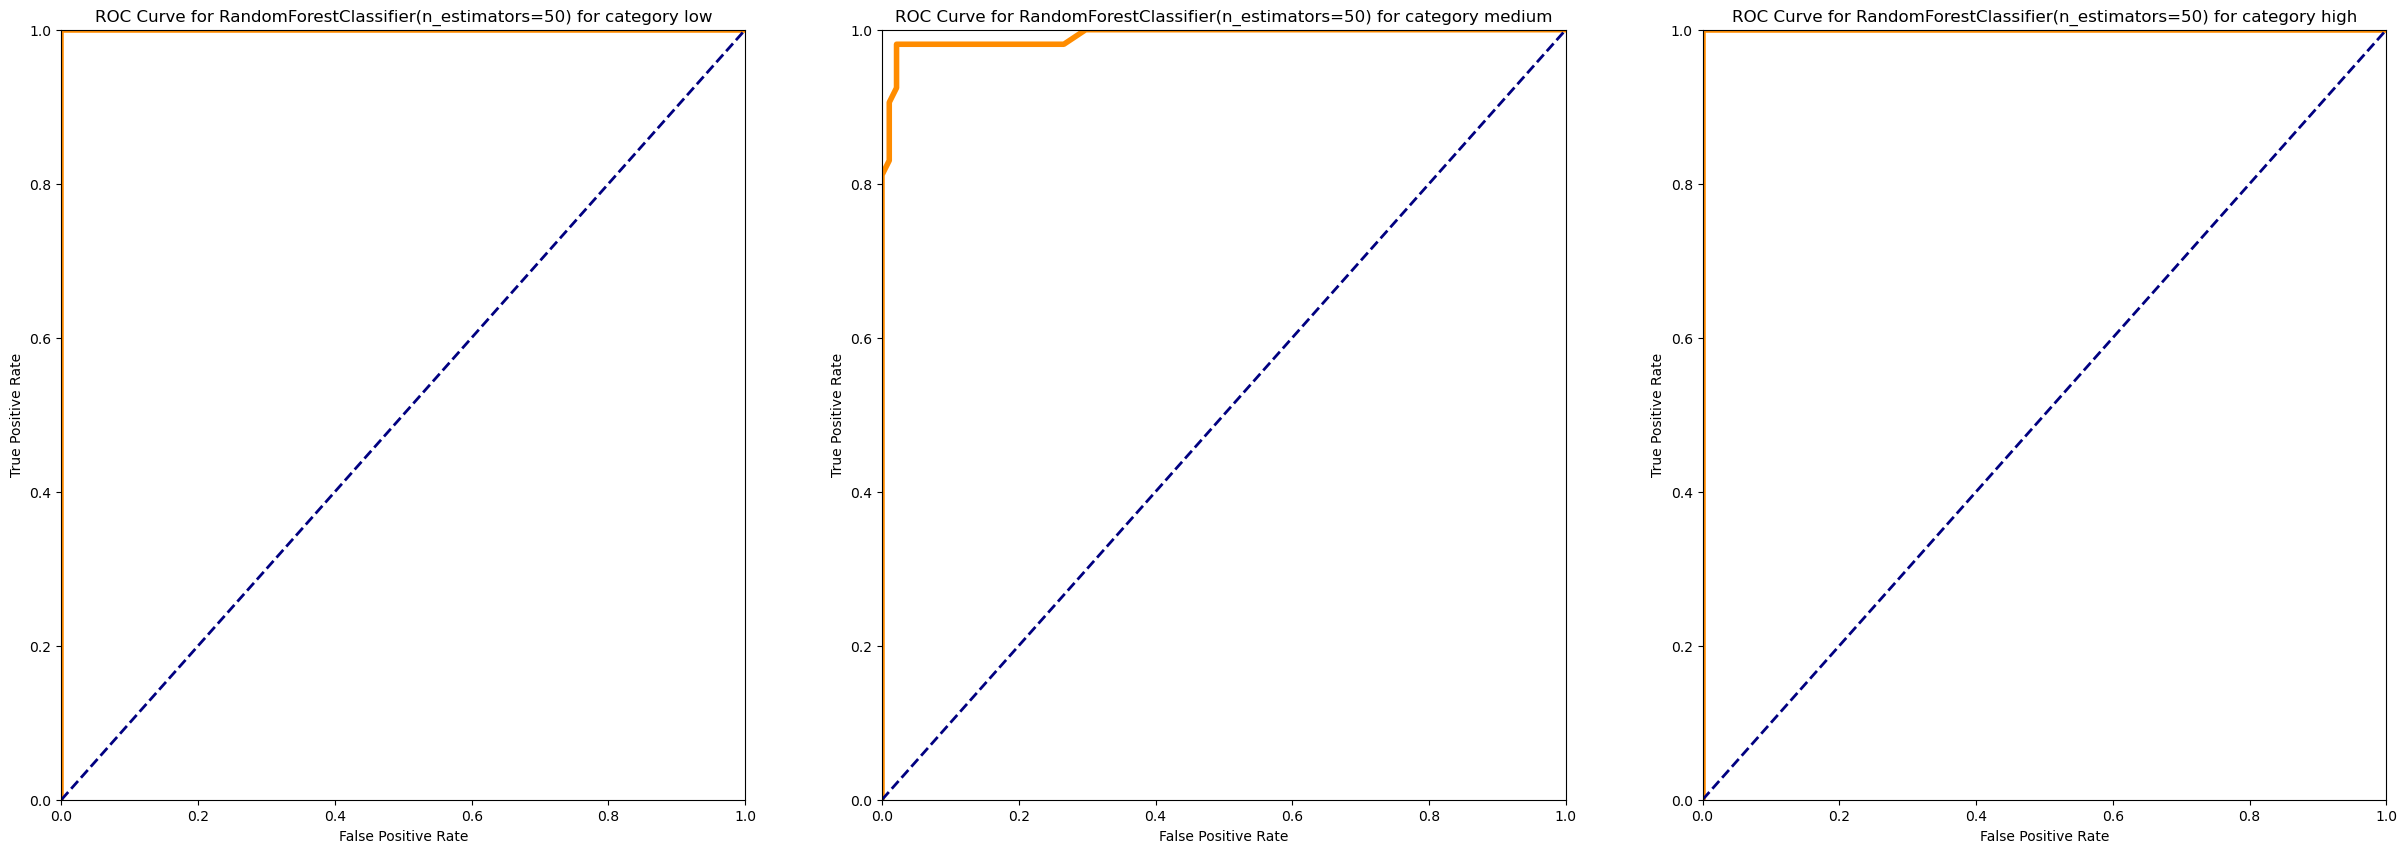

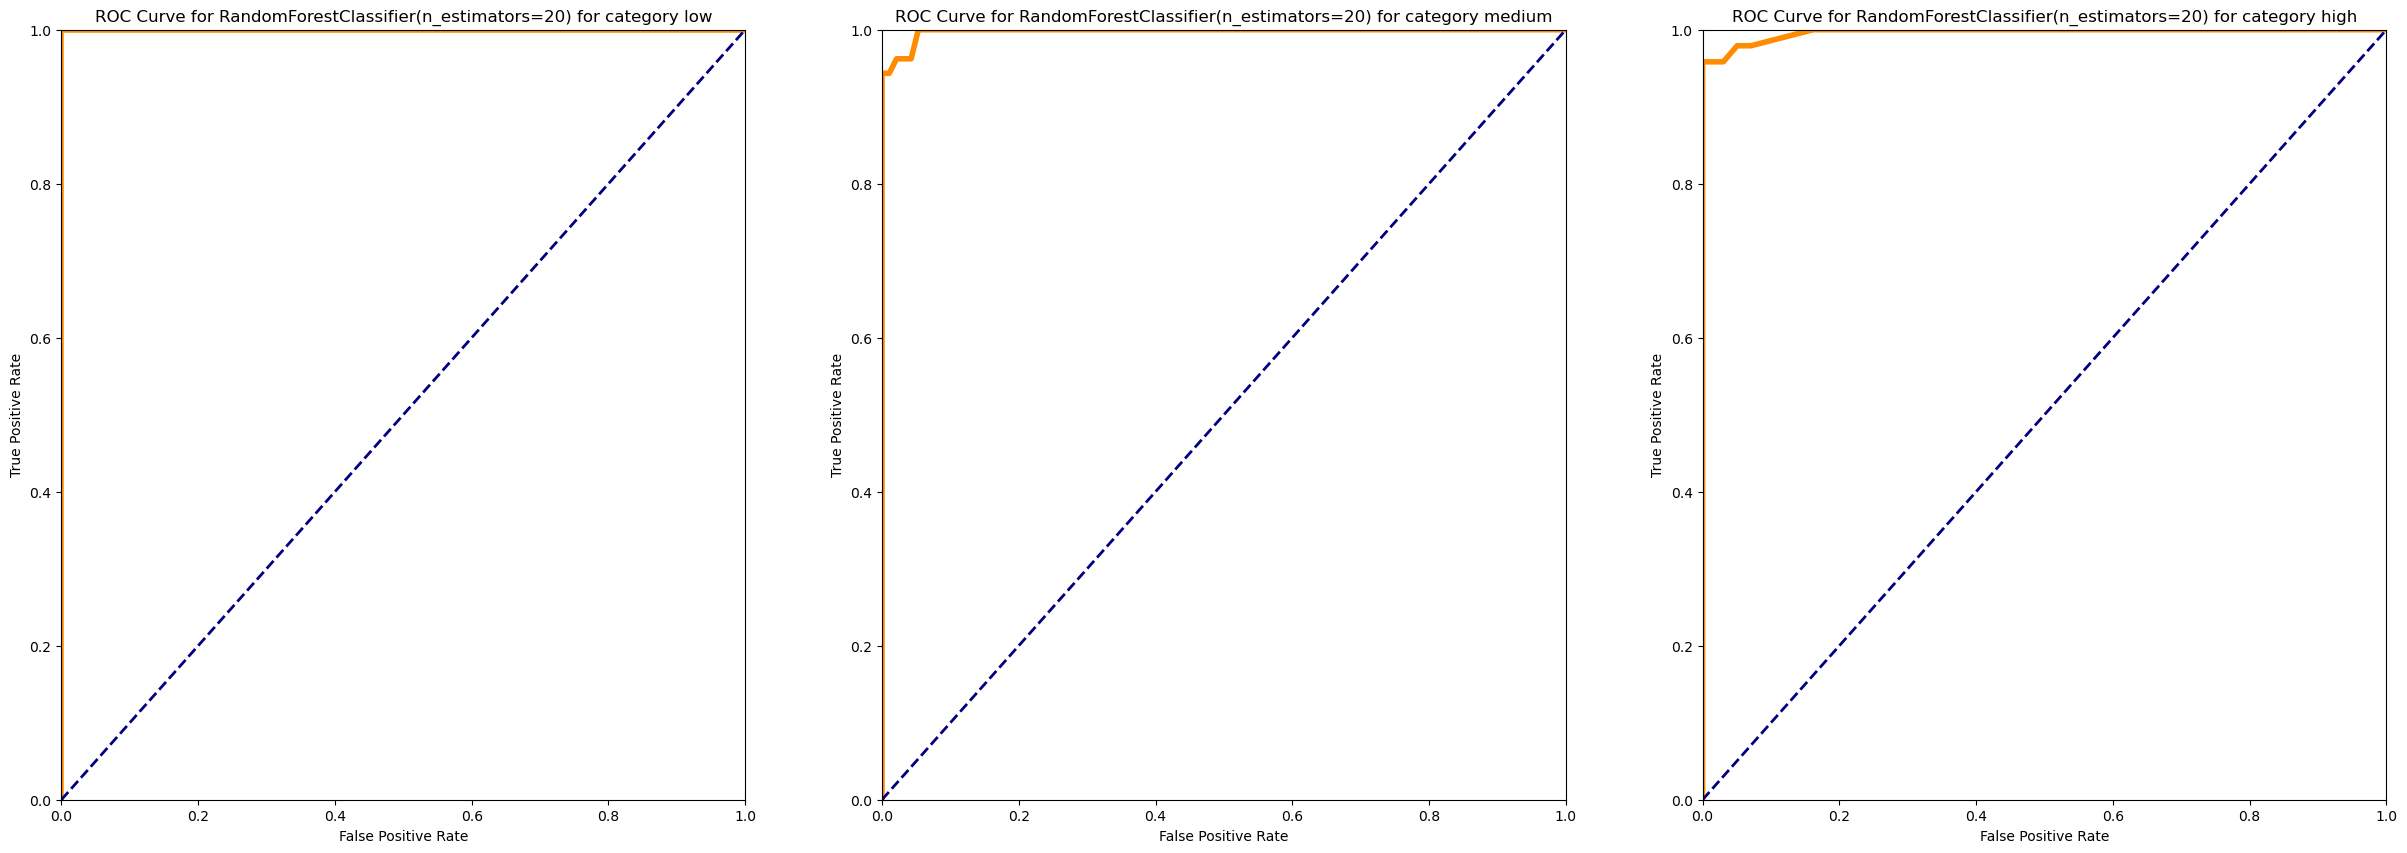

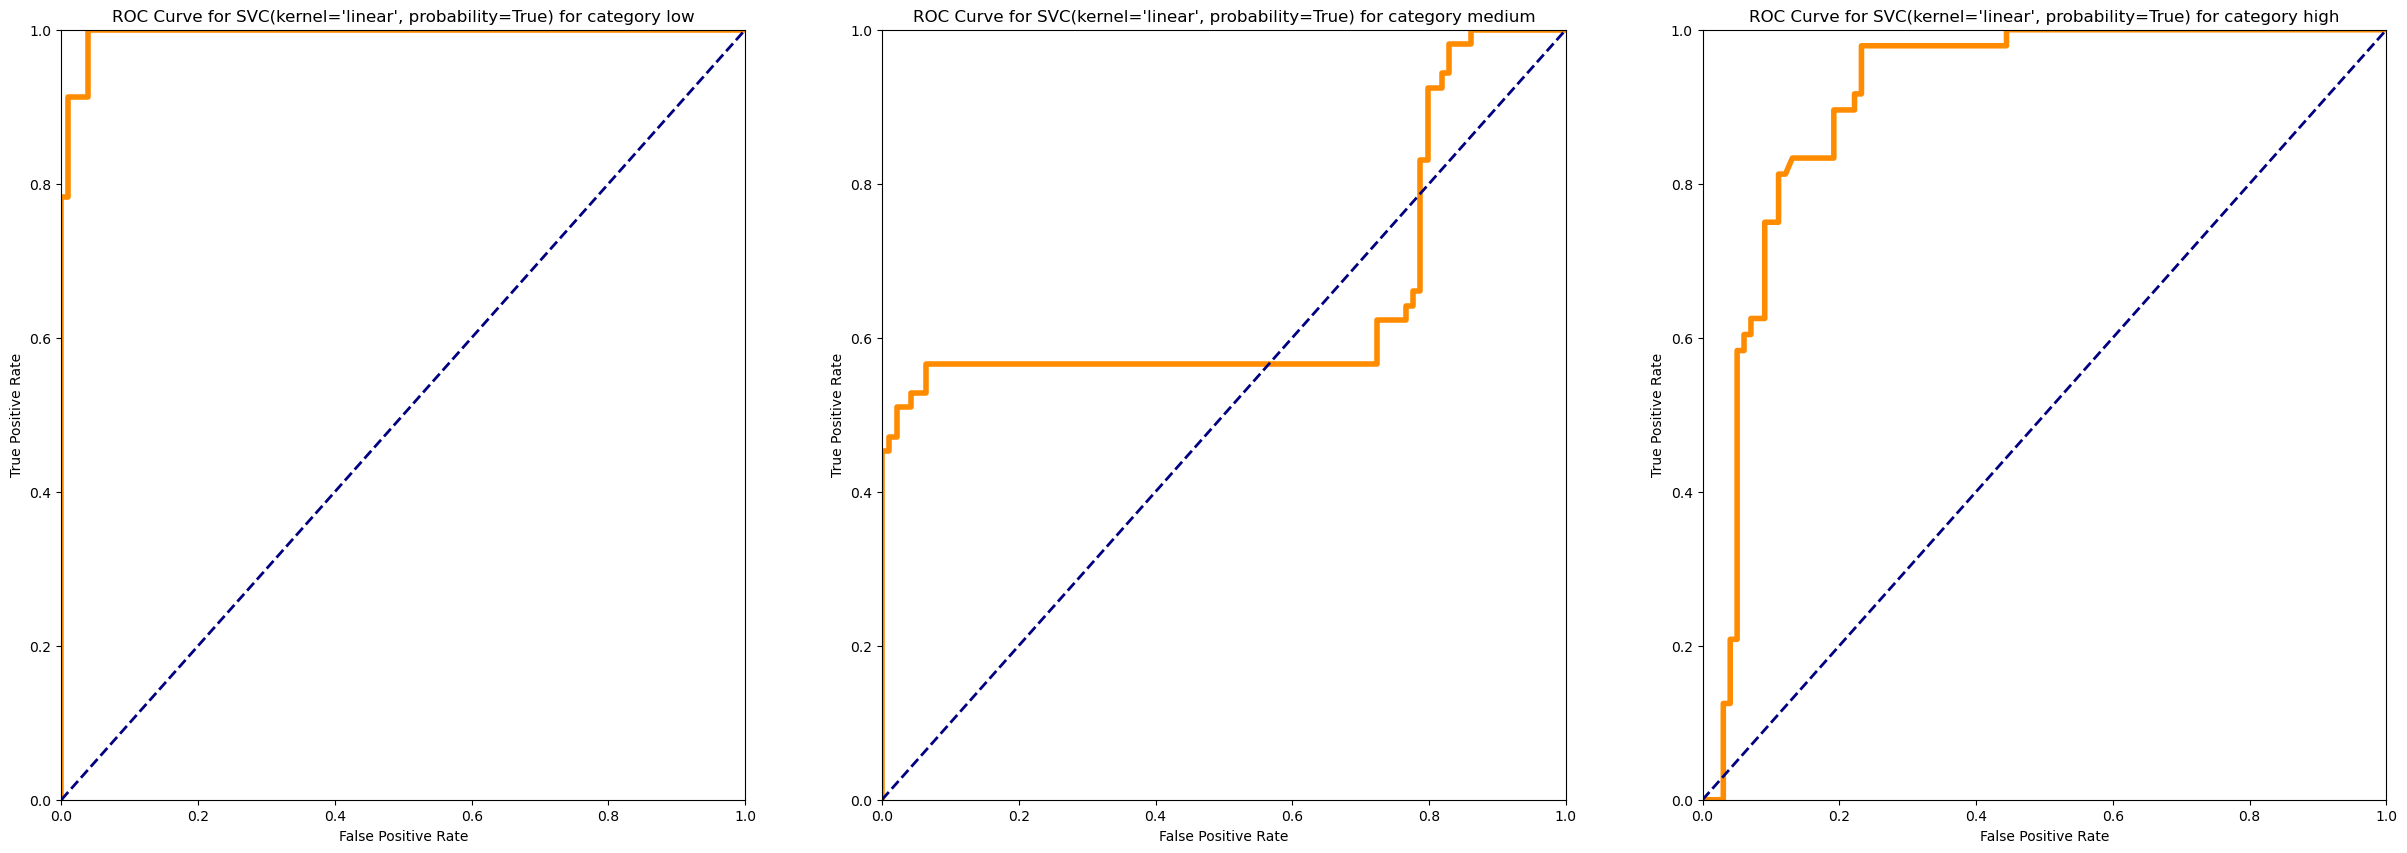

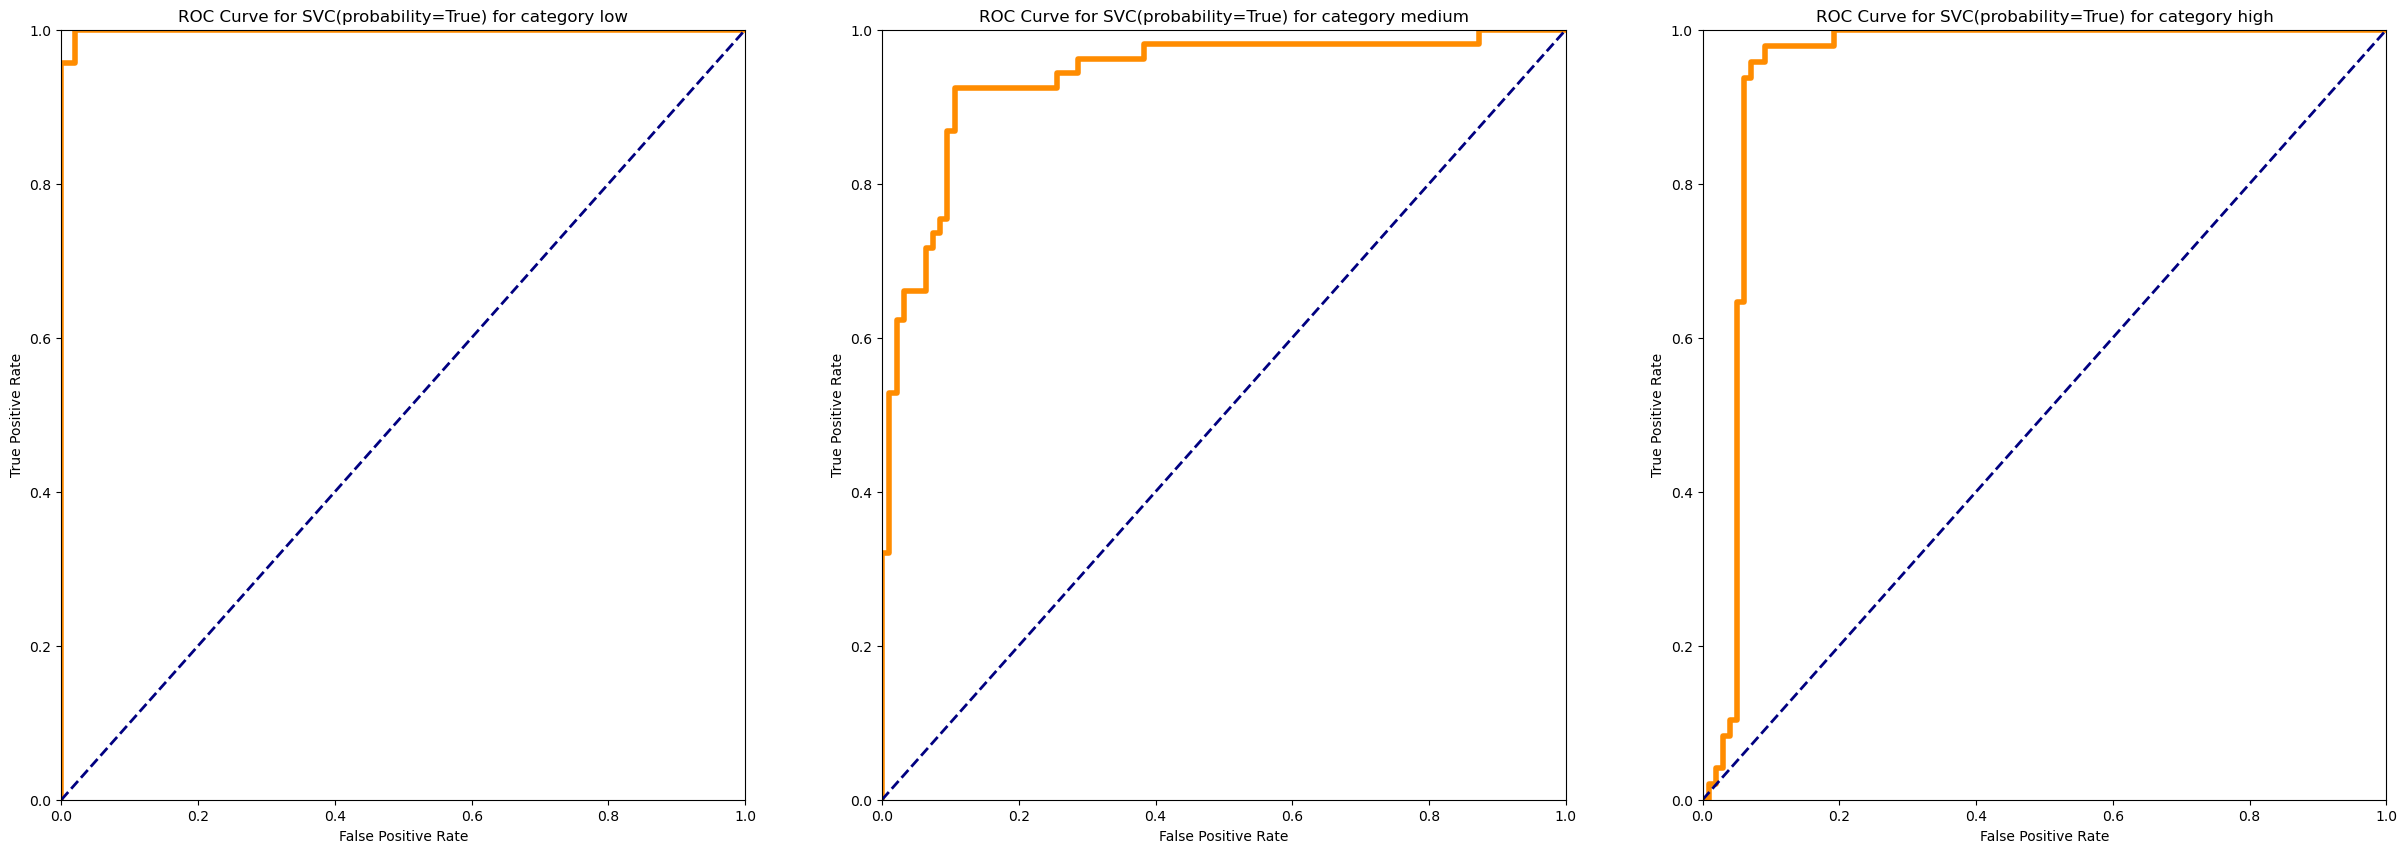

In [359]:
from sklearn.metrics import roc_curve
def plot_roc(y_test, y_train, x_train, x_test, category_name,model):
    y_test_cat = y_test == category_name
    classifier = model
    y_train = y_train == category_name
    classifier.fit(x_train,y_train)
    y_pred_proba = classifier.predict_proba(x_test)[:,1]

    fpr, tpr, th = roc_curve(y_test_cat, y_pred_proba)
    plt.title(f'ROC Curve for {classifier} for category {category_name}')
    plt.plot(fpr,tpr,color='darkorange', lw=4)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Logistic Regression
plt.figure(figsize= [30,10])
plt.subplot(1,3,1)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'low',LogisticRegression())
plt.subplot(1,3,2)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'medium',LogisticRegression())
plt.subplot(1,3,3)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'high',LogisticRegression())
plt.show()

# KNN - 5
plt.figure(figsize= [30,10])
plt.subplot(1,3,1)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'low',KNeighborsClassifier(n_neighbors=5))
plt.subplot(1,3,2)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'medium',KNeighborsClassifier(n_neighbors=5))
plt.subplot(1,3,3)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'high',KNeighborsClassifier(n_neighbors=5))
plt.show()

# KNN - 15
plt.figure(figsize= [30,10])
plt.subplot(1,3,1)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'low',KNeighborsClassifier(n_neighbors=15))
plt.subplot(1,3,2)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'medium',KNeighborsClassifier(n_neighbors=15))
plt.subplot(1,3,3)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'high',KNeighborsClassifier(n_neighbors=15))
plt.show()

# Random Forest with estimator 50
plt.figure(figsize= [30,10])
plt.subplot(1,3,1)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'low',RandomForestClassifier(n_estimators=50))
plt.subplot(1,3,2)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'medium',RandomForestClassifier(n_estimators=50))
plt.subplot(1,3,3)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'high',RandomForestClassifier(n_estimators=50))
plt.show()

# Random Forest with estimator 20
plt.figure(figsize= [30,10])
plt.subplot(1,3,1)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'low',RandomForestClassifier(n_estimators=20))
plt.subplot(1,3,2)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'medium',RandomForestClassifier(n_estimators=20))
plt.subplot(1,3,3)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'high',RandomForestClassifier(n_estimators=20))
plt.show()

# SVM with Linear Kernel
plt.figure(figsize= [30,10])
plt.subplot(1,3,1)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'low',SVC(kernel= 'linear',probability= True))
plt.subplot(1,3,2)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'medium',SVC(kernel= 'linear',probability= True))
plt.subplot(1,3,3)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'high',SVC(kernel= 'linear',probability= True))

# SVM with RBF Kernel
plt.figure(figsize= [30,10])
plt.subplot(1,3,1)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'low',SVC(kernel= 'rbf',probability= True))
plt.subplot(1,3,2)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'medium',SVC(kernel= 'rbf',probability= True))
plt.subplot(1,3,3)
plt.title('low')
plot_roc(y_test,y_train, x_train,x_test, 'high',SVC(kernel= 'rbf',probability= True))